# TidyPlots API Examples

Comprehensive test of ALL functions in TidyPlots API using seaborn datasets.

In [1]:
pip install -e ../

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Obtaining file:///Users/yin/Library/CloudStorage/OneDrive-Personal/2.doing/tidyplots-python
  Preparing metadata (setup.py) ... done
  Attempting uninstall: tidyplots-python
    Found existing installation: tidyplots-python 0.1.0
    Uninstalling tidyplots-python-0.1.0:
      Successfully uninstalled tidyplots-python-0.1.0
  Running setup.py develop for tidyplots-python
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import tidyplots  # Import the package which will monkey-patch pandas

# Create figures directory if it doesn't exist
os.makedirs("figures", exist_ok=True)

# Load all available seaborn datasets
iris = sns.load_dataset("iris")
tips = sns.load_dataset("tips")
titanic = sns.load_dataset("titanic")
planets = sns.load_dataset("planets")
diamonds = sns.load_dataset("diamonds")
flights = sns.load_dataset("flights")

/Users/yin/Library/CloudStorage/OneDrive-Personal/2.doing/tidyplots-python/tidyplots/__init__.py:13: UserWarning: registration of accessor <class 'tidyplots.TidyPlotAccessor'> under name 'tidyplot' for type <class 'pandas.core.frame.DataFrame'> is overriding a preexisting attribute with the same name.


# 1. Basic Plots

## 1.1 Scatter Plot


Creating scatter plot...


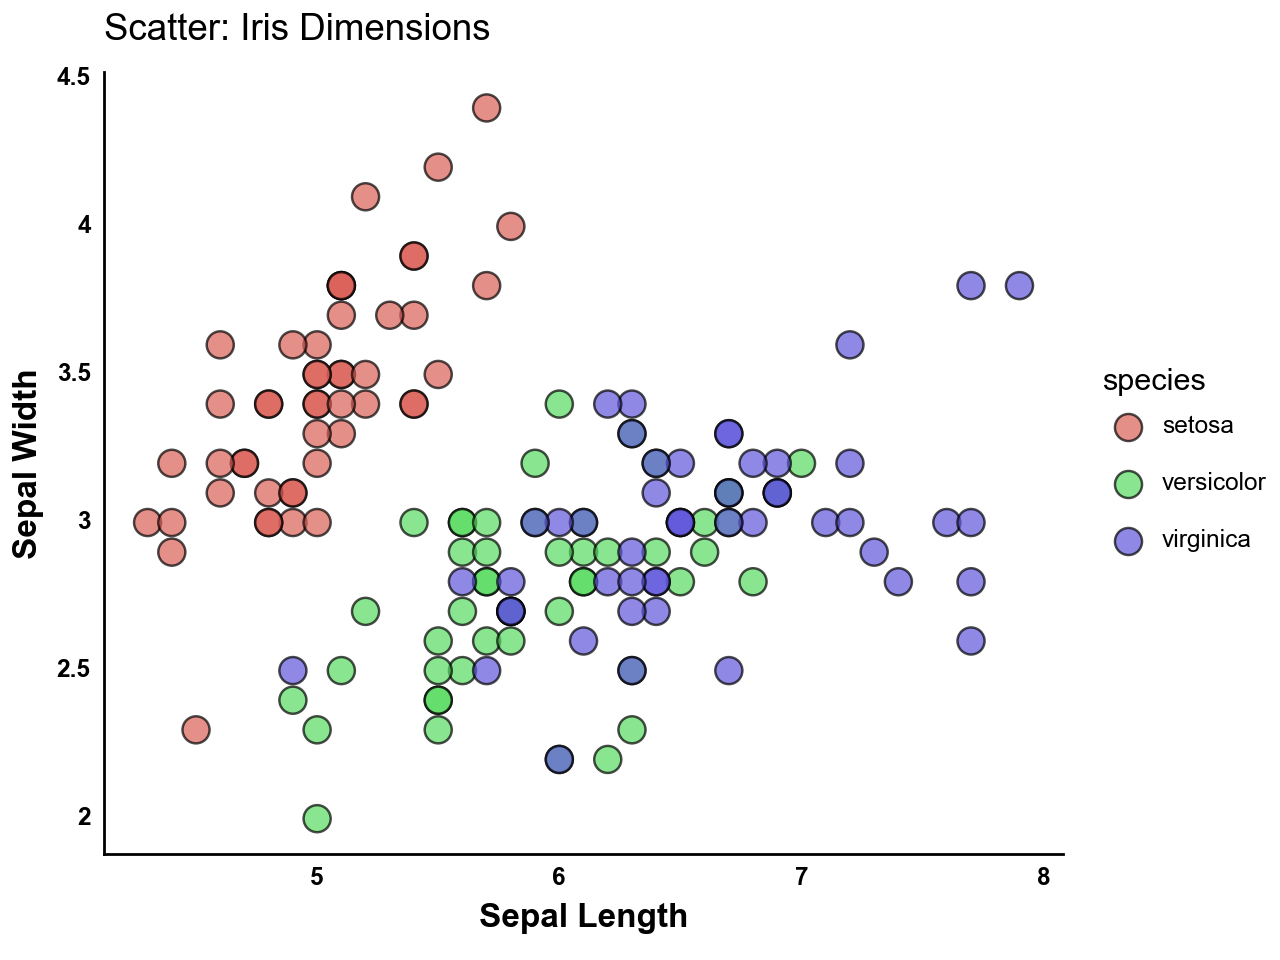

<Figure Size: (640 x 480)>

In [3]:
print("\nCreating scatter plot...")
(iris.tidyplot(x='sepal_length', y='sepal_width', fill='species')
 .add_scatter(size=5, alpha=0.7)
 .adjust_labels(title='Scatter: Iris Dimensions',
               x='Sepal Length', y='Sepal Width')
 .adjust_legend_position('right')
 .show())

## 1.2 Line Plot

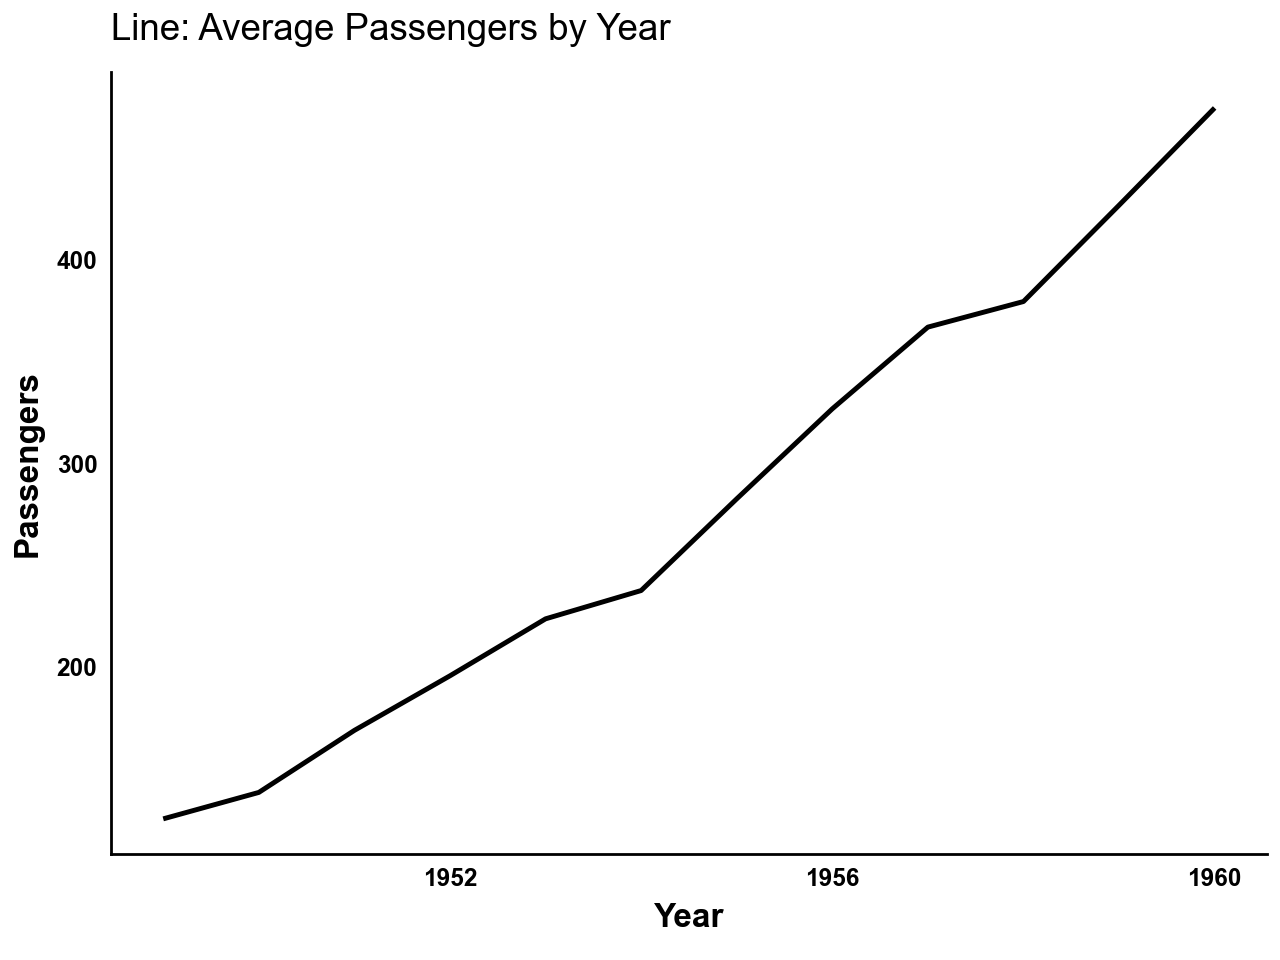

<Figure Size: (640 x 480)>

In [4]:
monthly_passengers = flights.groupby('year', observed=True)['passengers'].mean().reset_index()
(monthly_passengers.tidyplot(x='year', y='passengers')
 .add_line(size=1, alpha=1.0)
 .adjust_labels(title='Line: Average Passengers by Year',
               x='Year', y='Passengers')
 .show())

# 1.3 Bar Plot

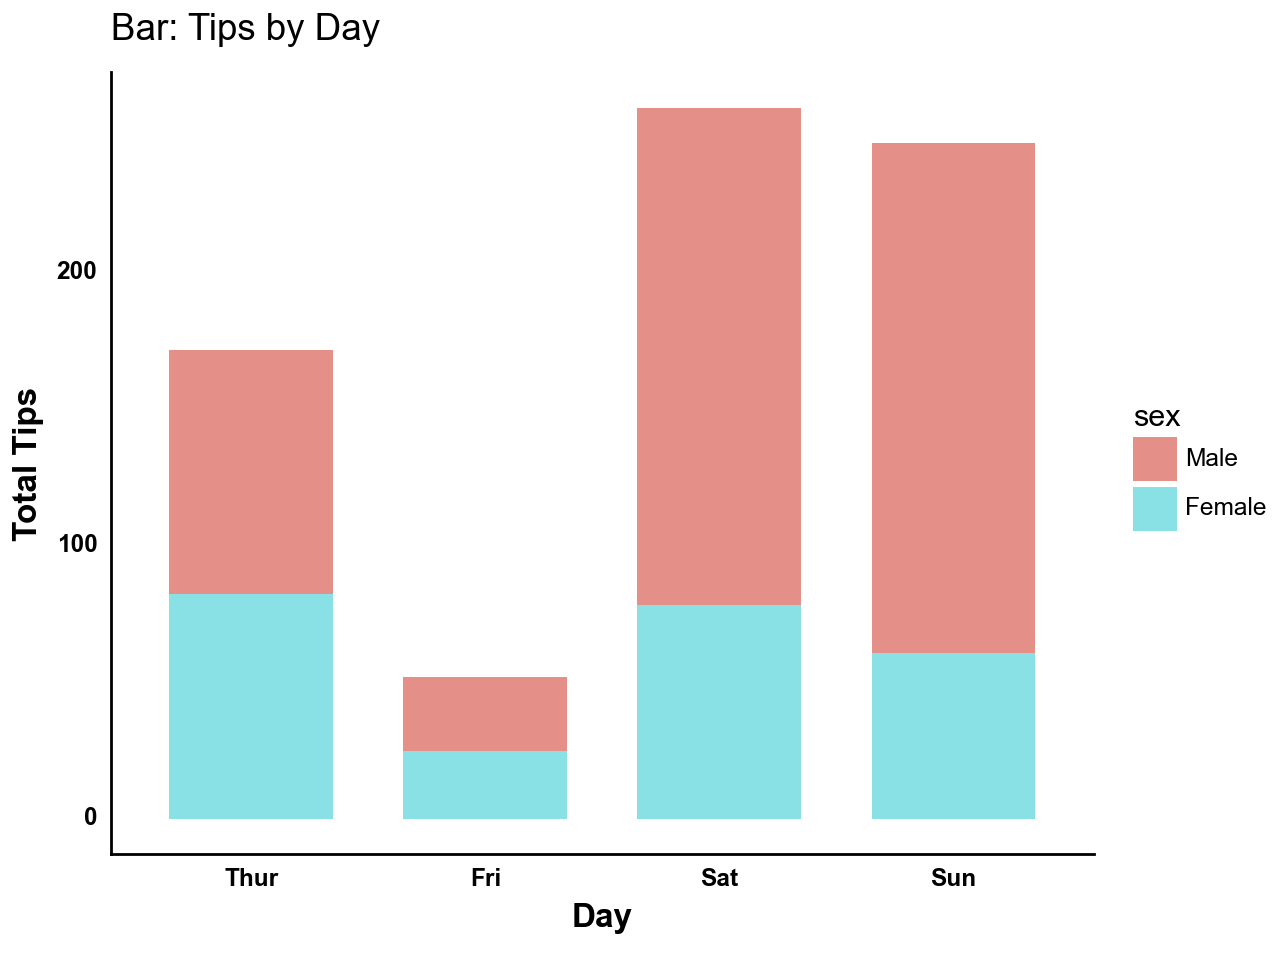

<Figure Size: (640 x 480)>

In [5]:
(tips.tidyplot(x='day', y='tip', fill='sex')
 .add_bar(stat='identity', width=0.7, alpha=0.7)
 .adjust_labels(title='Bar: Tips by Day',
               x='Day', y='Total Tips')
 .show())

# 1.4 Box Plot

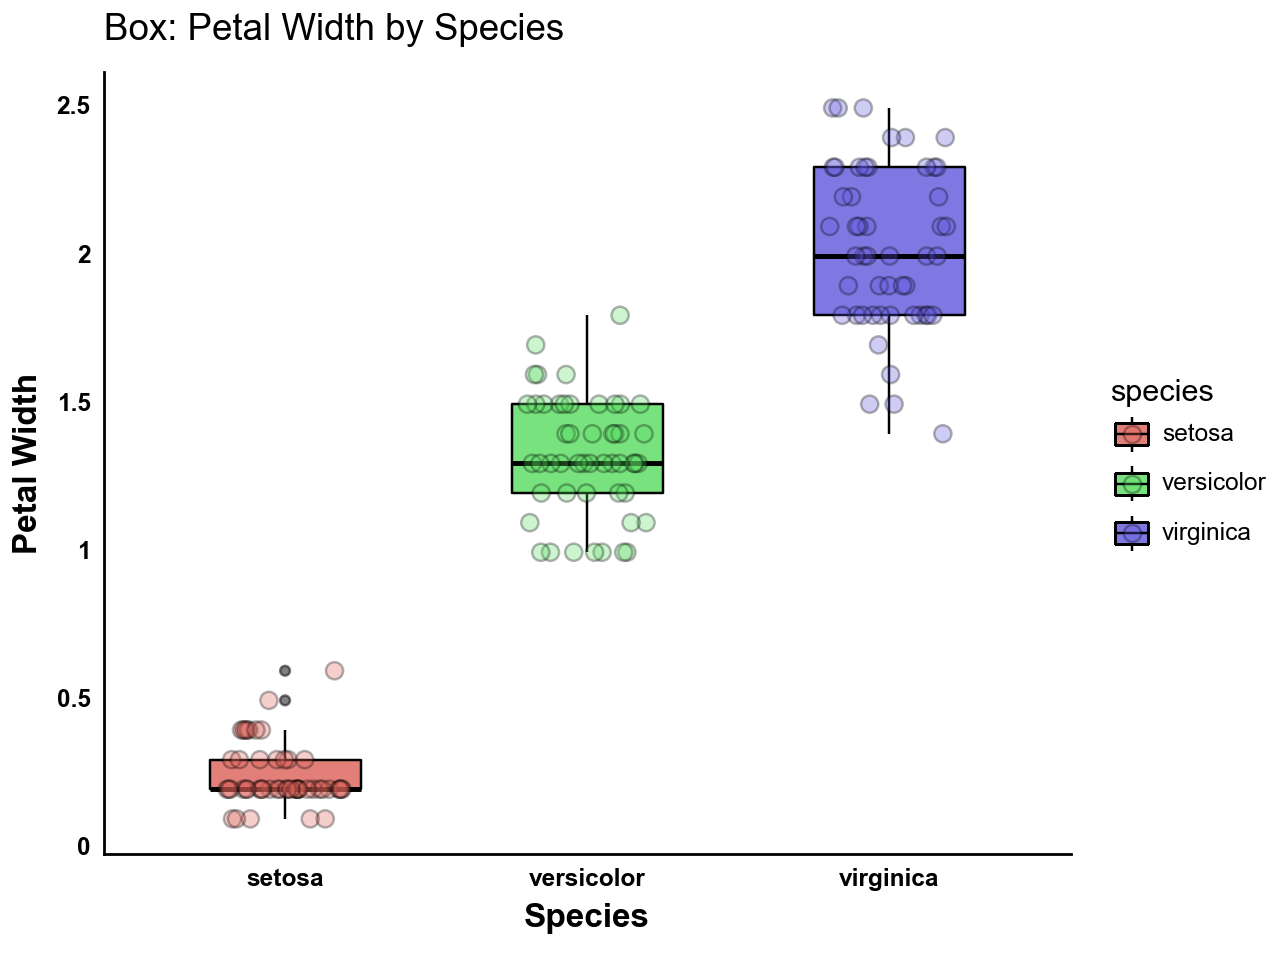

<Figure Size: (640 x 480)>

In [6]:
(iris.tidyplot(x='species', y='petal_width', fill='species')
 .add_boxplot(alpha=0.8, outlier_alpha=0.5, color="black", width=0.5)
 .add_data_points_beeswarm(size=3, alpha=0.3)
 .adjust_labels(title='Box: Petal Width by Species',
               x='Species', y='Petal Width')
 .show())

# 1.5 Violin Plot

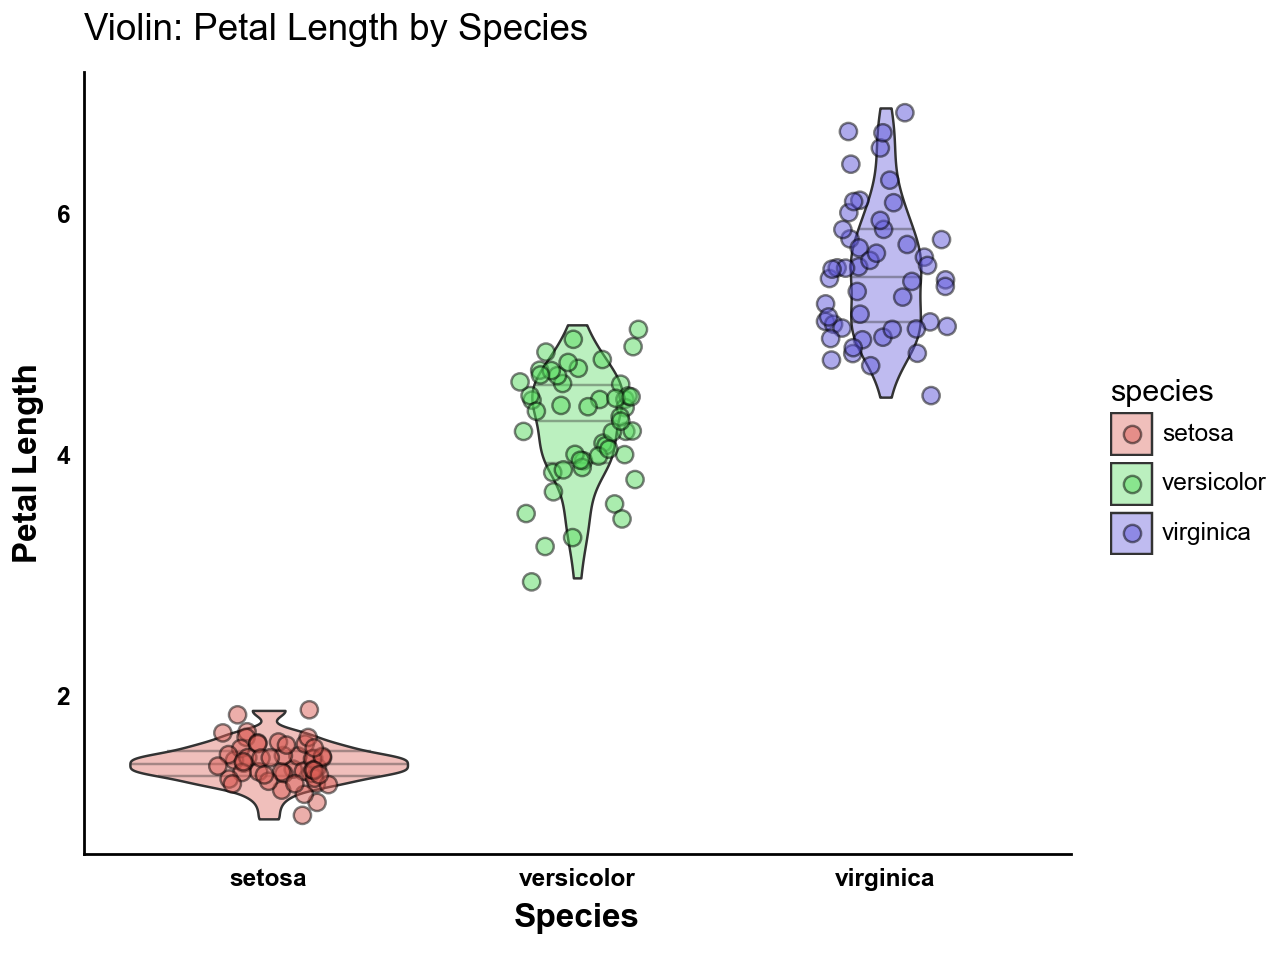

<Figure Size: (640 x 480)>

In [7]:
(iris.tidyplot(x='species', y='petal_length', fill='species')
 .add_violin(alpha=0.4, draw_quantiles=[0.25, 0.5, 0.75])
 .add_data_points_jitter(width=0.2, size=3, alpha=0.5)
 .adjust_labels(title='Violin: Petal Length by Species',
               x='Species', y='Petal Length')
 .show())

# 1.6 Density Plot

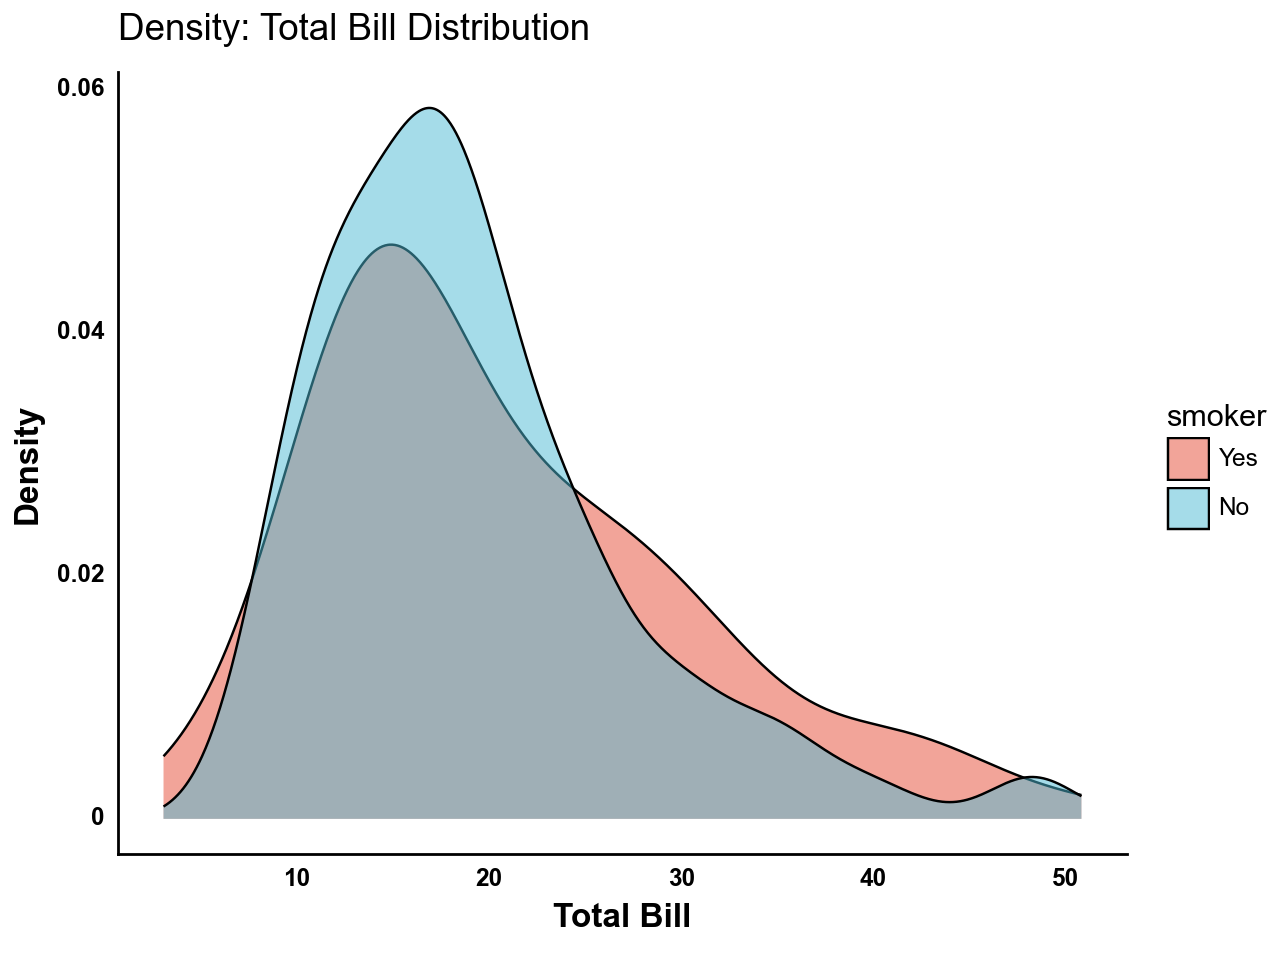

<Figure Size: (640 x 480)>

In [8]:
(tips.tidyplot(x='total_bill', fill='smoker')
 .add_density(alpha=0.5)
 .adjust_labels(title='Density: Total Bill Distribution',
               x='Total Bill', y='Density')
 .show())

# 1.7 Step Plot

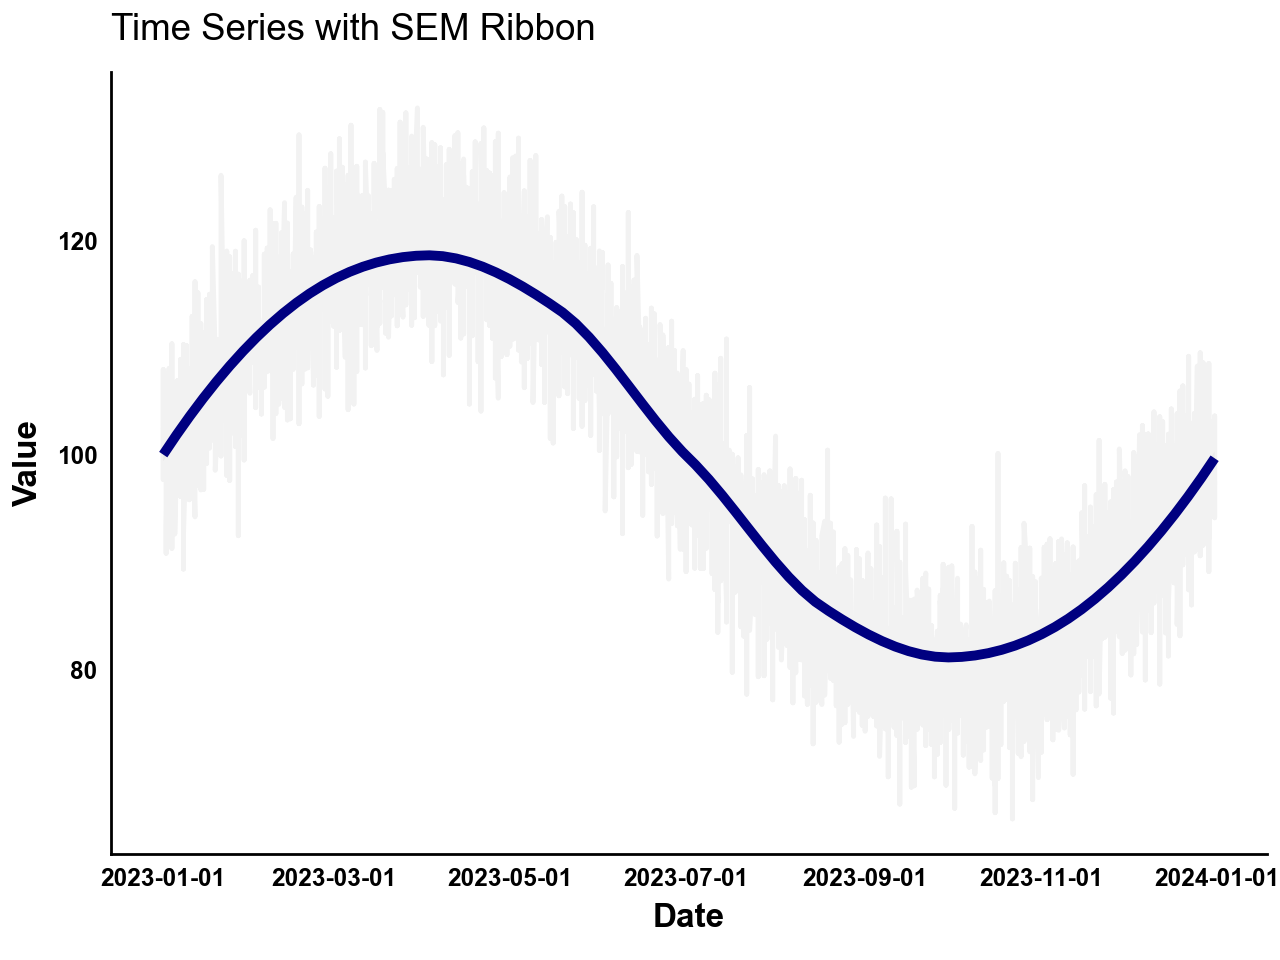

<Figure Size: (640 x 480)>

In [9]:
# tips_sorted = tips.sort_values('tip')
# tips_sorted['cumsum'] = tips_sorted['tip'].cumsum()
# (tips_sorted.tidyplot(x=range(len(tips)), y='cumsum')
#  .add_step(direction='hv')
# #  .add_line(size=1, alpha=1, color='blue')
# #  .add_sem_ribbon(alpha=0.2)
#  .adjust_labels(title='Step: Cumulative Tips',
#                x='Count', y='Cumulative Tips')
#  .show())
np.random.seed(42)
dates = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')
n_samples = 10
data = []
for date in dates:
    base = 100 + 20 * np.sin(date.dayofyear * 2 * np.pi / 365)
    for _ in range(n_samples):
        value = base + np.random.normal(0, 5)
        data.append({'date': date, 'value': value})
ts_data = pd.DataFrame(data)
(ts_data.tidyplot(x='date', y='value')
    .add_line(size=1, alpha=.1, color='grey')
    .add_sem_ribbon(alpha=0.1, color='navy', size=2)
    .adjust_labels(title='Time Series with SEM Ribbon',
                x='Date', y='Value')
    .show()
)

# 1.8 Dot Plot

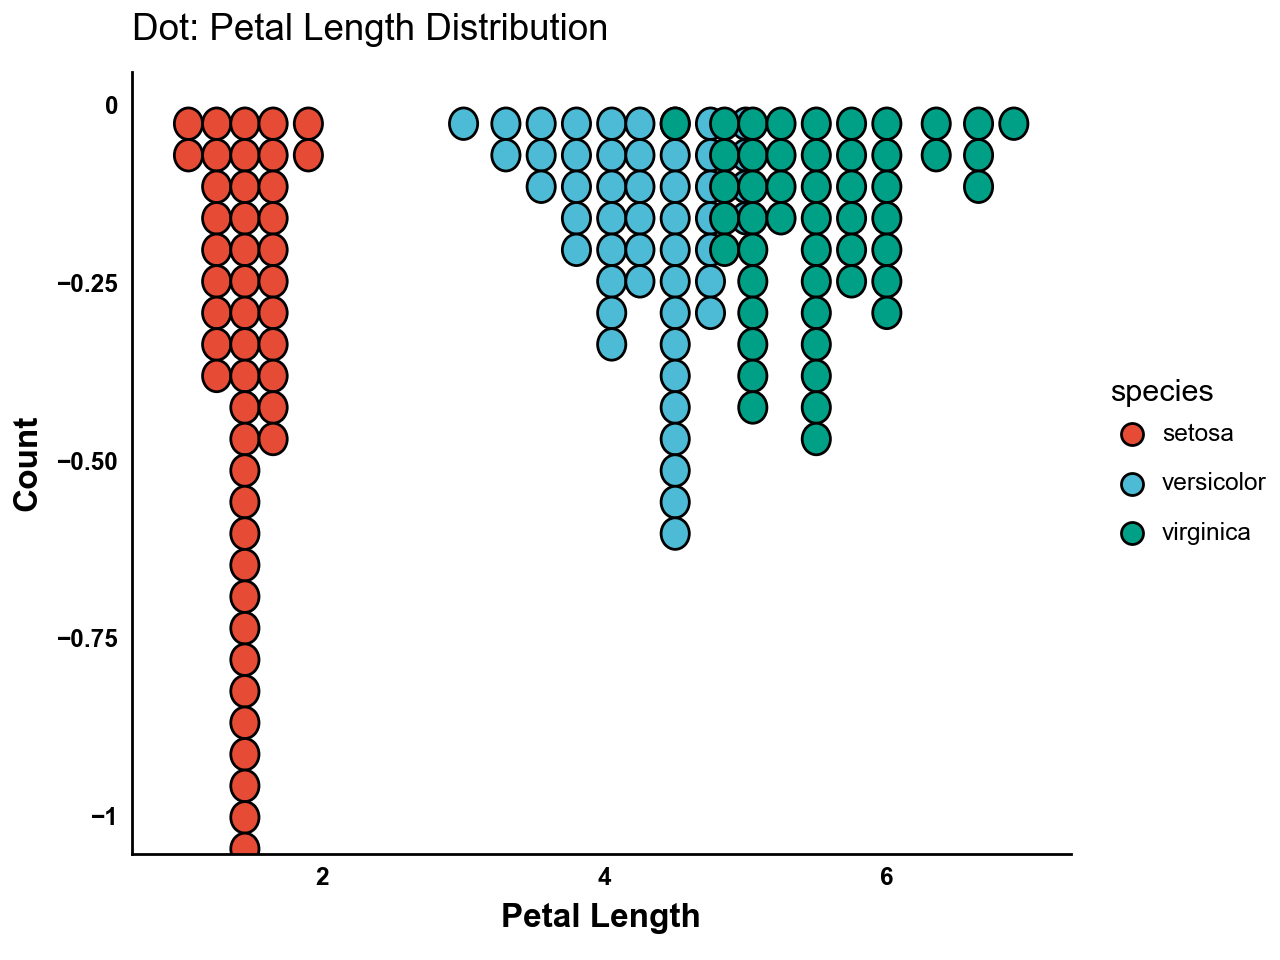

<Figure Size: (640 x 480)>

In [10]:
(iris.tidyplot(x='petal_length', fill='species')
 .add_dotplot(binwidth=0.2, stackdir='down', binaxis='x')
 .adjust_labels(title='Dot: Petal Length Distribution',
               x='Petal Length', y='Count')
 .show())

# 2. Statistical Plots

# 2.1 Mean Bar

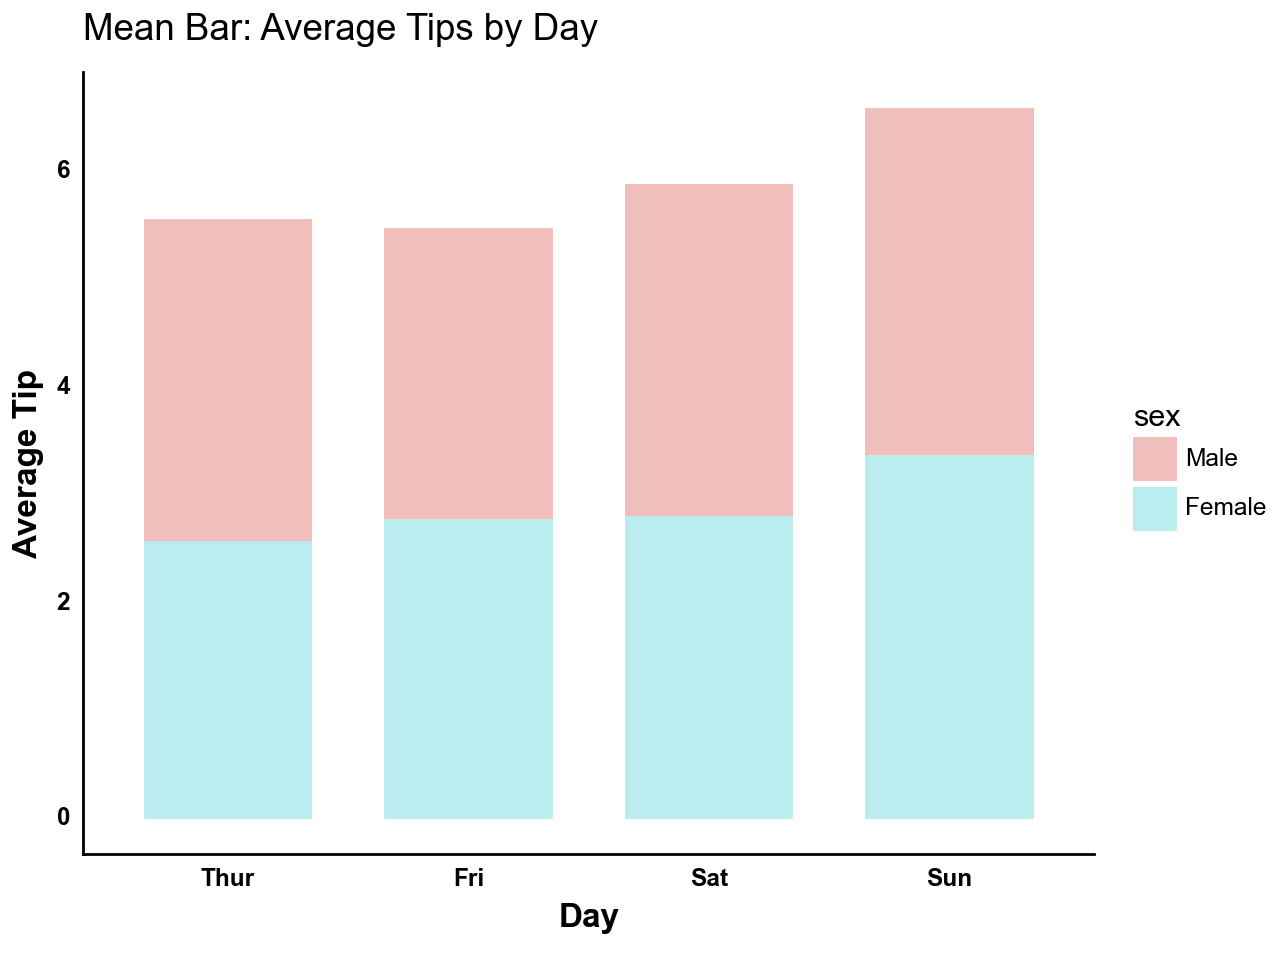

<Figure Size: (640 x 480)>

In [11]:
(tips.tidyplot(x='day', y='tip', fill='sex')
 .add_mean_bar(alpha=0.4, width=0.7)
 .adjust_labels(title='Mean Bar: Average Tips by Day',
               x='Day', y='Average Tip')
 .show())

# 2.2 SEM Error Bar

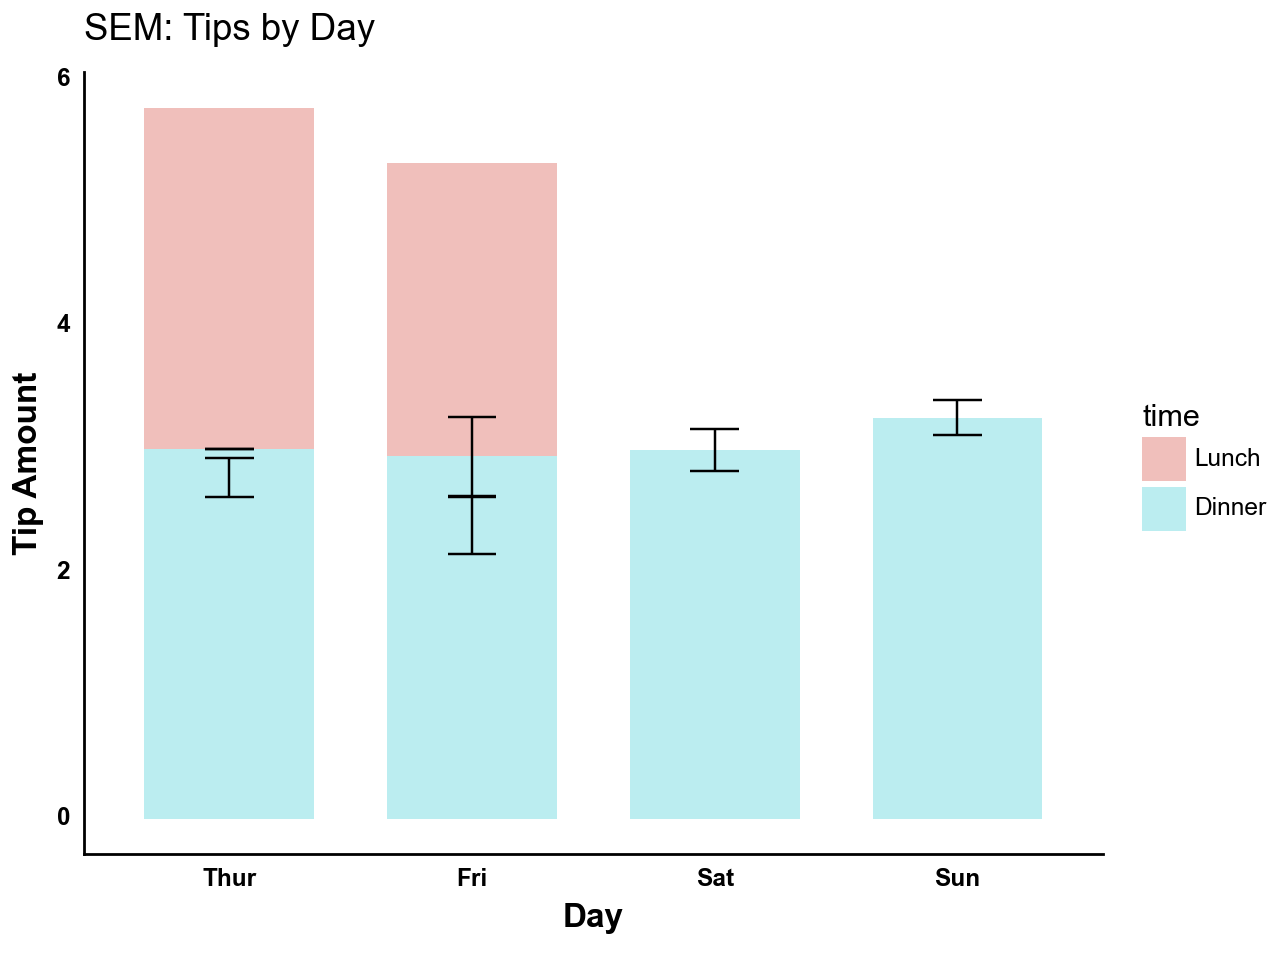

<Figure Size: (640 x 480)>

In [12]:
(tips.tidyplot(x='day', y='tip', fill='time')
 .add_mean_bar(alpha=0.4, width=0.7)
 .add_sem_errorbar(width=0.2)
 .adjust_labels(title='SEM: Tips by Day',
               x='Day', y='Tip Amount')
 .show())

# 2.3 SD Error Bar

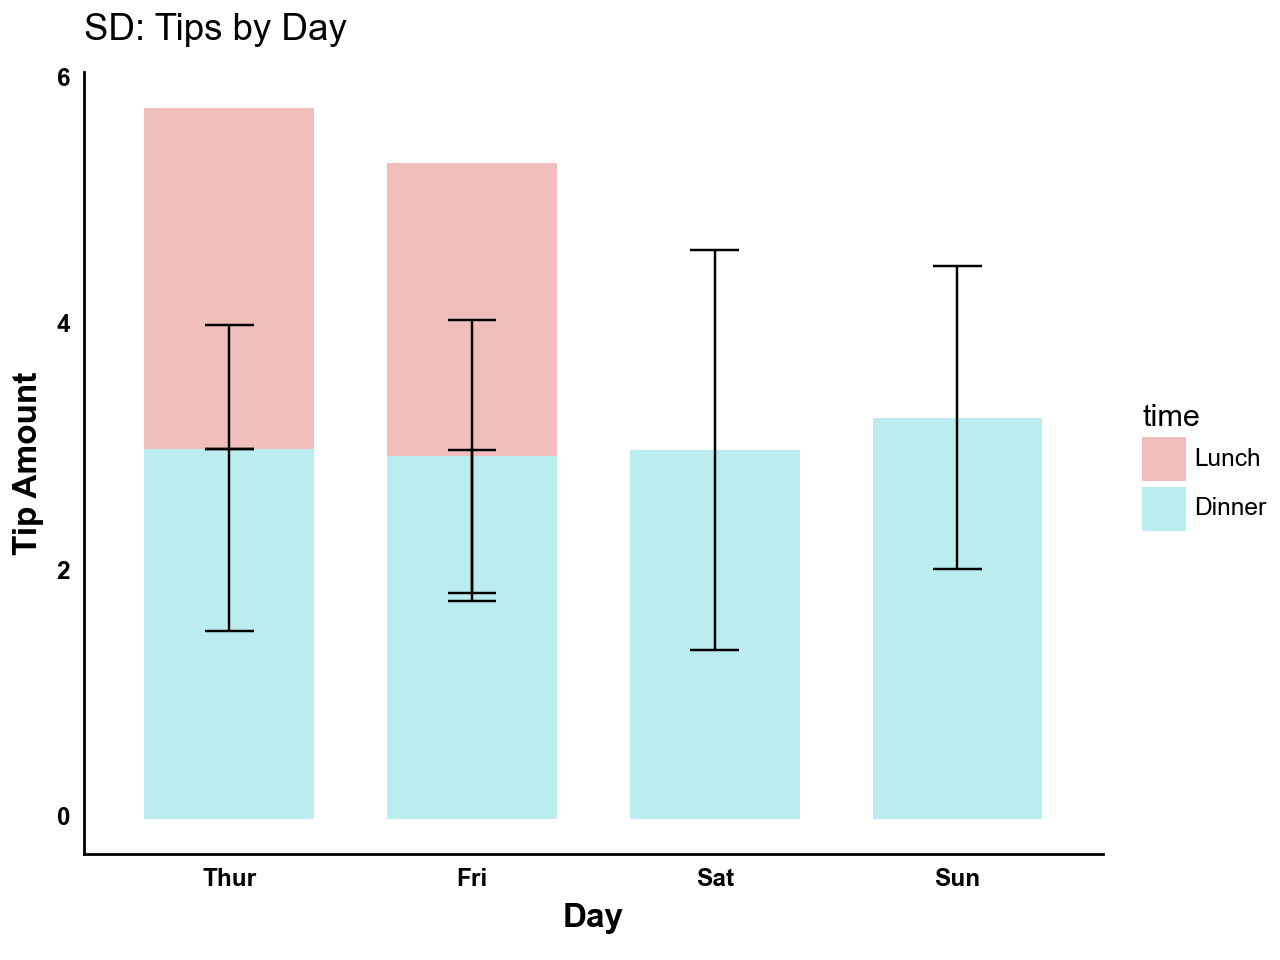

<Figure Size: (640 x 480)>

In [13]:
(tips.tidyplot(x='day', y='tip', fill='time')
 .add_mean_bar(alpha=0.4, width=0.7)
 .add_sd_errorbar(width=0.2)
 .adjust_labels(title='SD: Tips by Day',
               x='Day', y='Tip Amount')
 .show())

# 2.4 CI Error Bar

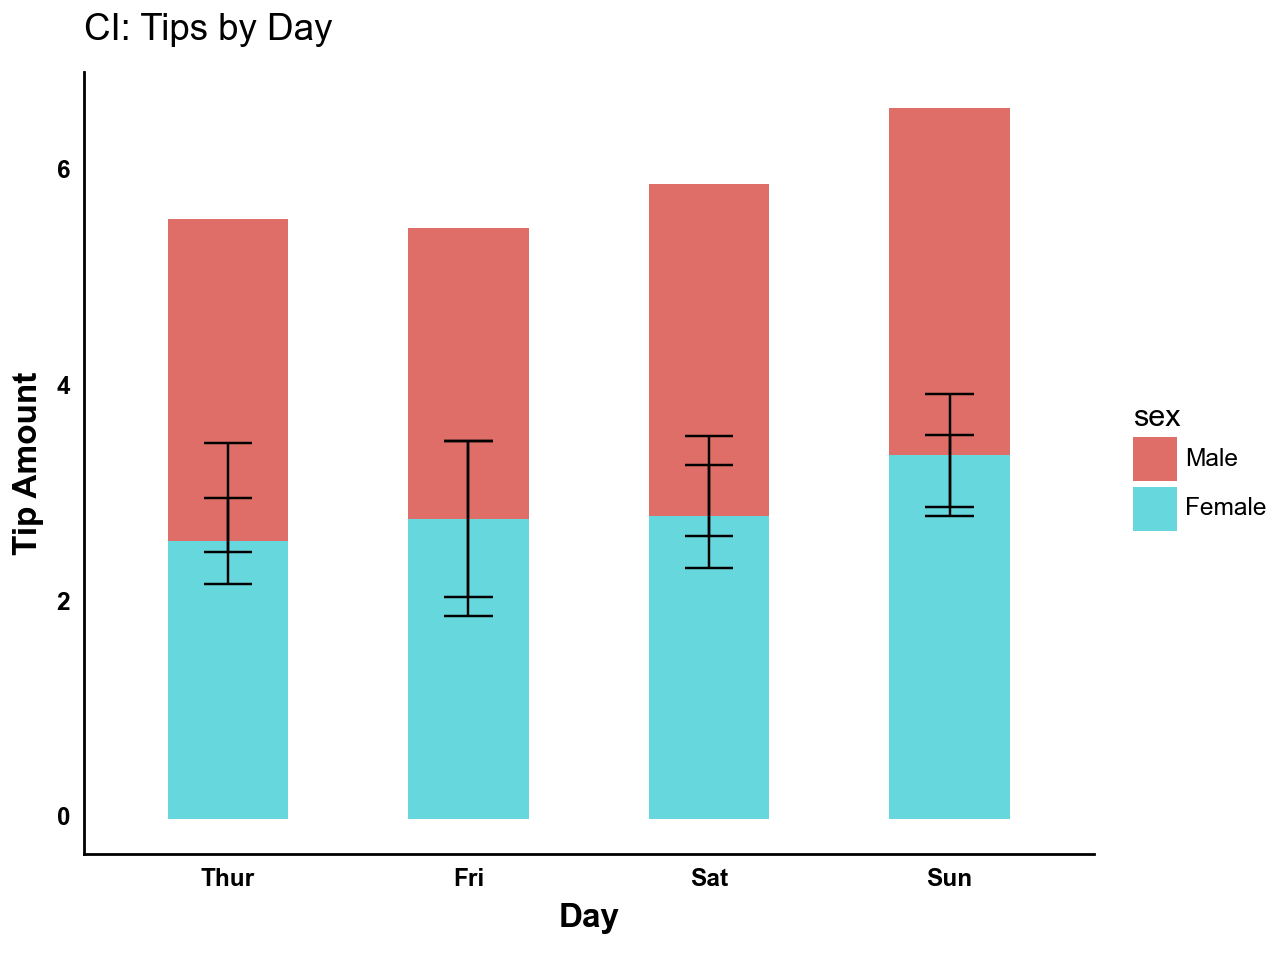

<Figure Size: (640 x 480)>

In [14]:
(tips.tidyplot(x='day', y='tip', fill='sex')
 .add_mean_bar(alpha=0.9, width=0.5)
 .add_ci_errorbar(width=0.2, ci=0.95)
 .adjust_labels(title='CI: Tips by Day',
               x='Day', y='Tip Amount')
 .show())

# 2.5 Custom Error Bar

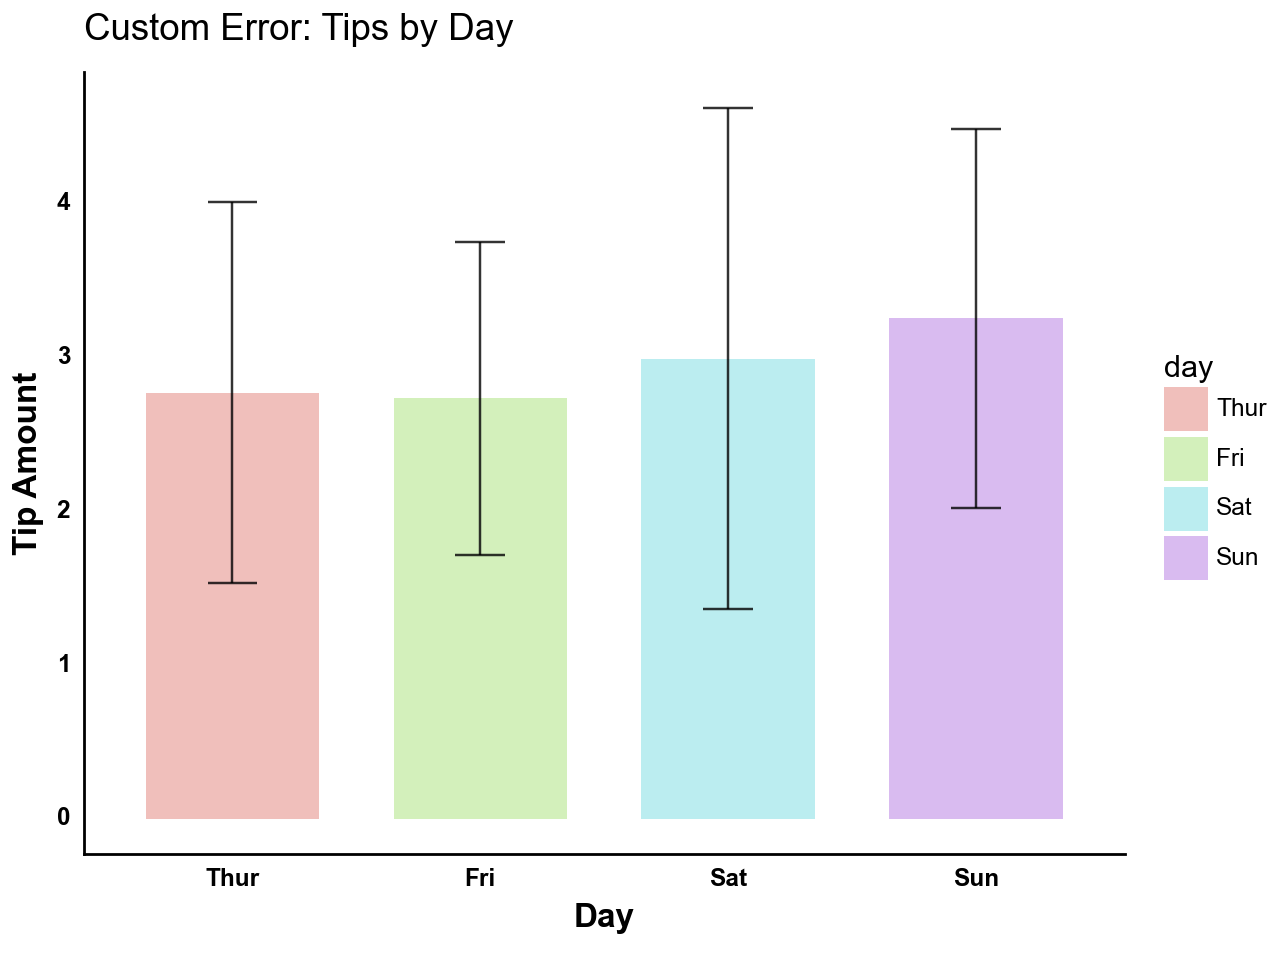

<Figure Size: (640 x 480)>

In [15]:
tips_summary = tips.groupby('day', observed=True).agg({
    'tip': ['mean', lambda x: x.mean() - x.std(), lambda x: x.mean() + x.std()]
}).reset_index()
tips_summary.columns = ['day', 'mean', 'lower', 'upper']
(tips_summary.tidyplot(x='day', y='mean', fill='day')
 .add_mean_bar(alpha=0.4, width=0.7)
 .add_errorbar(ymin='lower', ymax='upper', width=0.2)
 .adjust_labels(title='Custom Error: Tips by Day',
               x='Day', y='Tip Amount')
 .show())

# 2.6 Test P-value

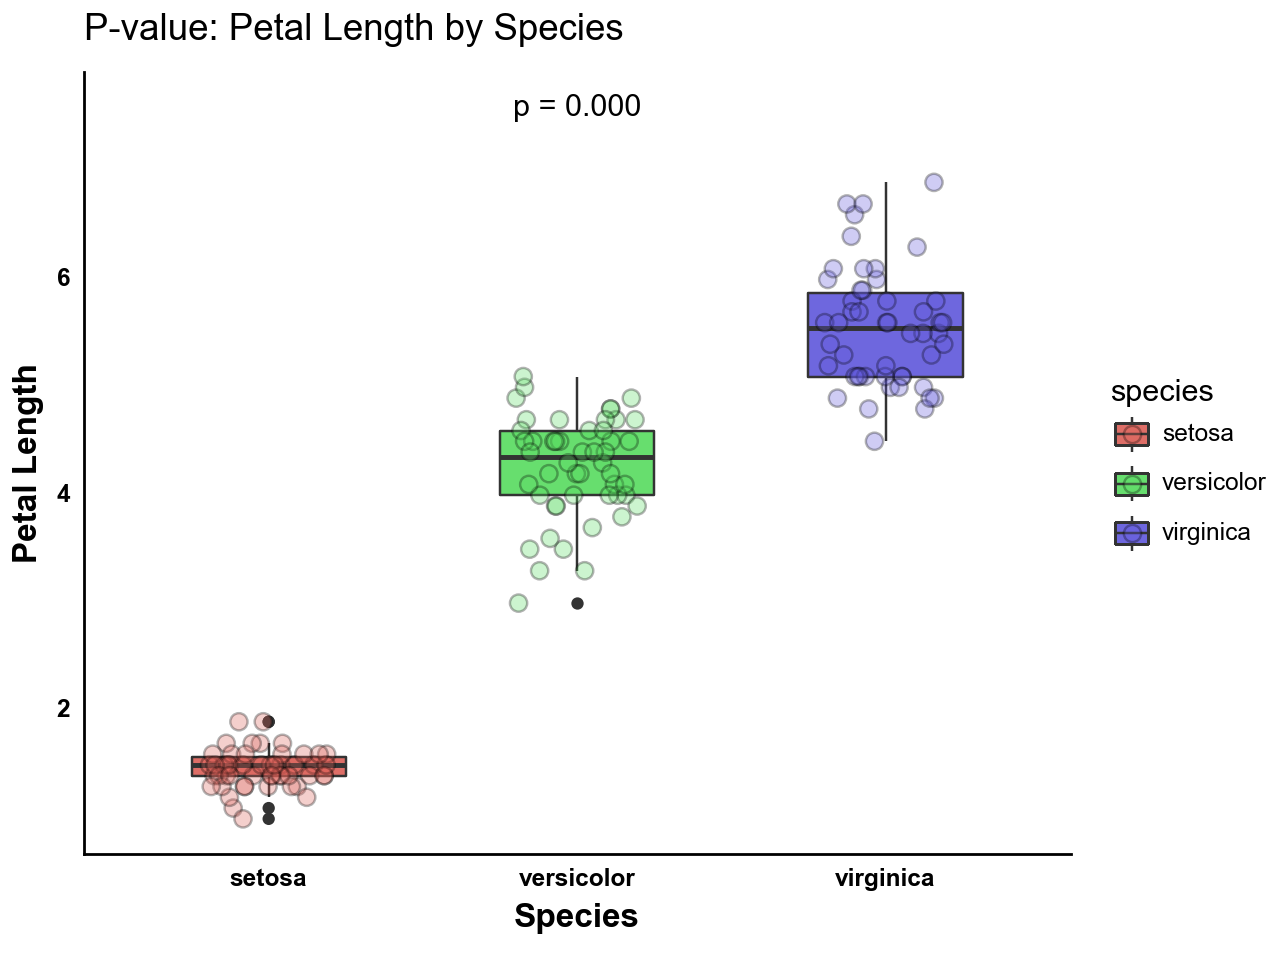

<Figure Size: (640 x 480)>

In [16]:
(iris.tidyplot(x='species', y='petal_length', fill='species')
 .add_boxplot(alpha=.9, width=0.5)
 .add_data_points_beeswarm(size=3, alpha=0.3)
 .add_test_pvalue(test='anova', paired=True)
 .adjust_labels(title='P-value: Petal Length by Species',
               x='Species', y='Petal Length')
 .show())

# 2.7 Correlation Text

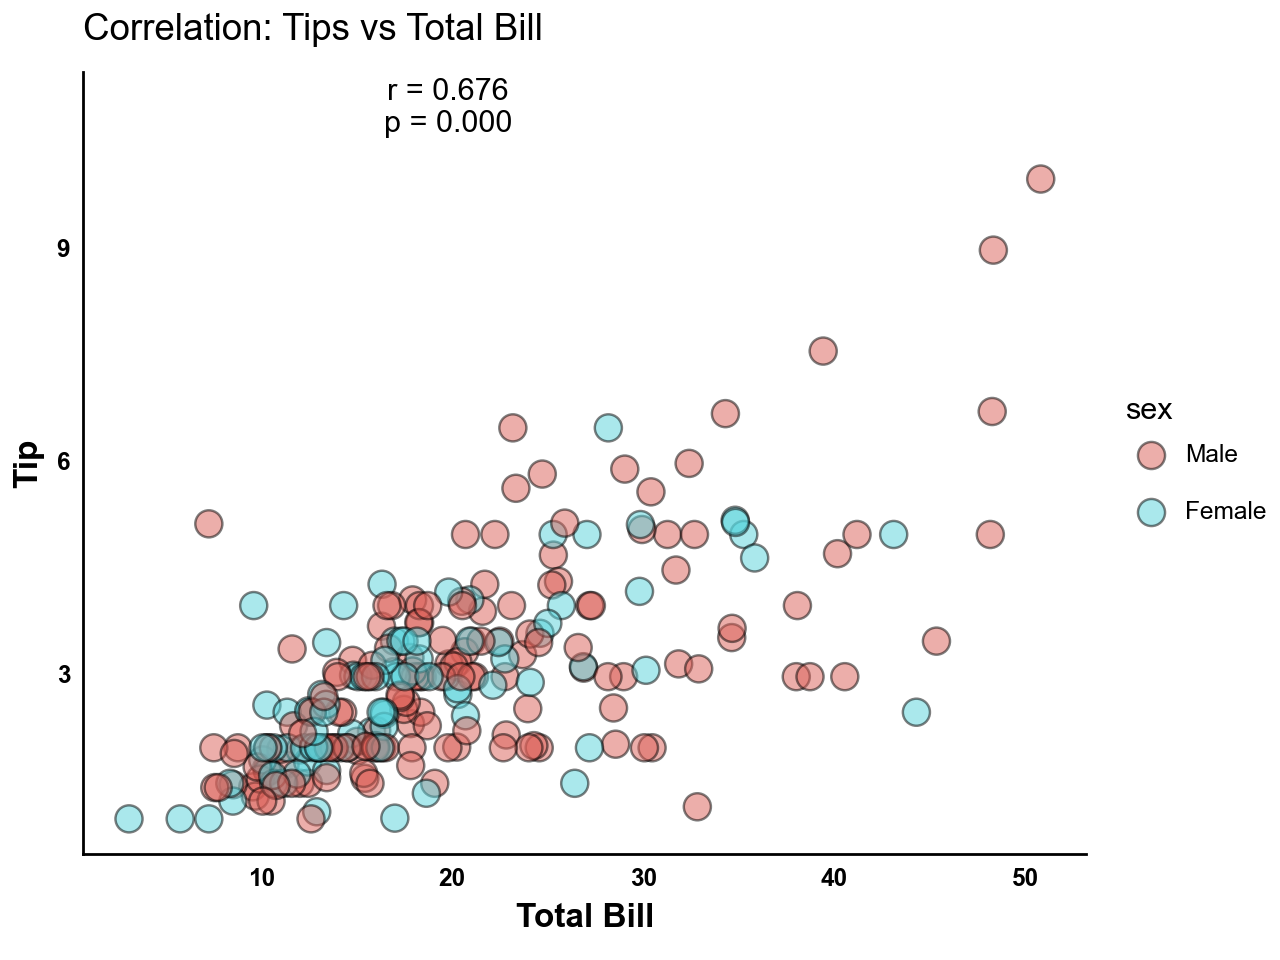

<Figure Size: (640 x 480)>

In [17]:
(tips.tidyplot(x='total_bill', y='tip', fill='sex')
 .add_scatter(size=5, alpha=0.5)
 .add_correlation_text(method='pearson', format='.3f')
 .adjust_labels(title='Correlation: Tips vs Total Bill',
               x='Total Bill', y='Tip')
 .show())

# 2.8 Smooth Line

In [18]:
tips

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

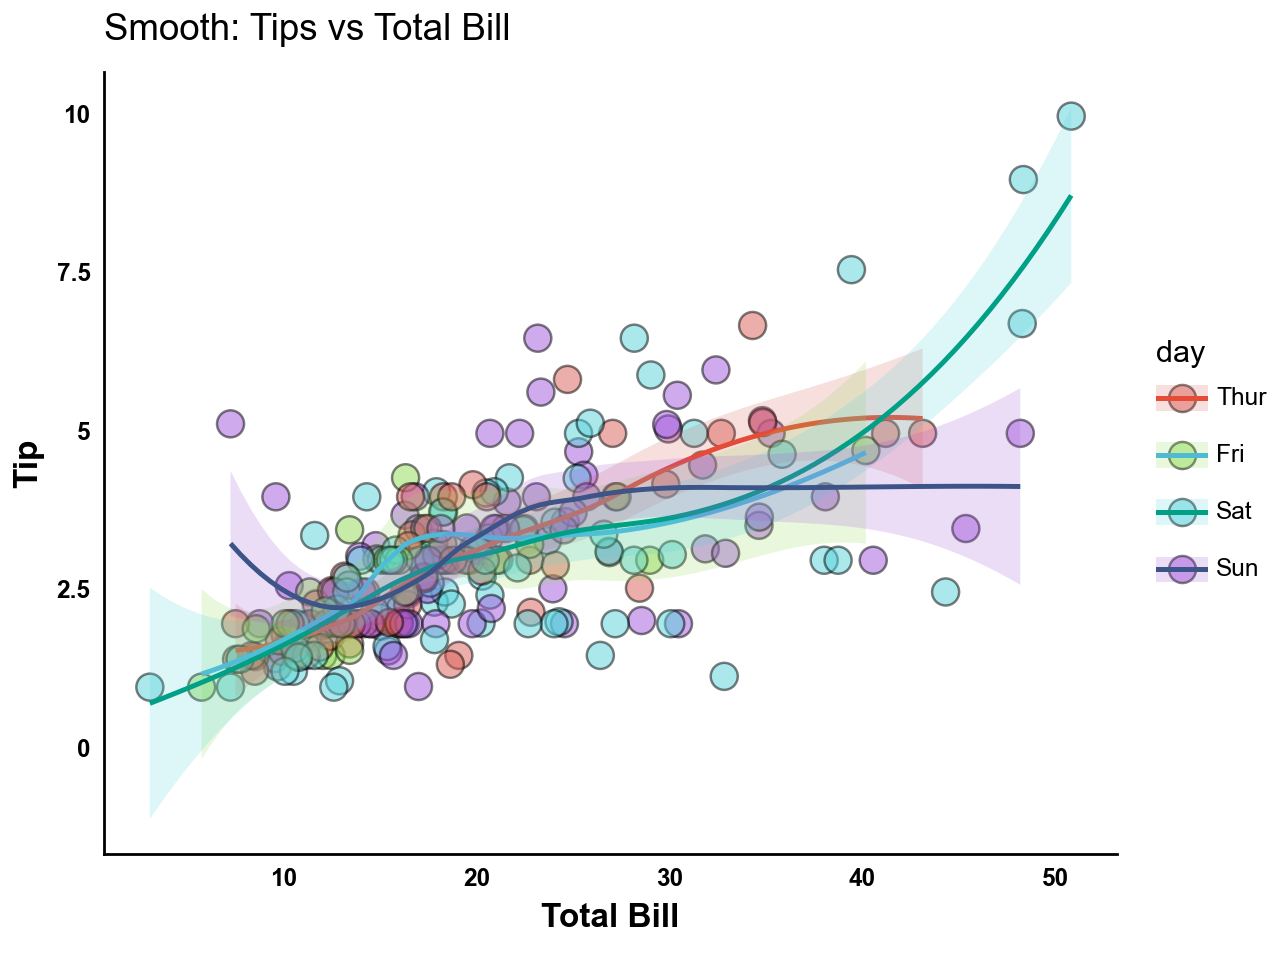

<Figure Size: (640 x 480)>

In [19]:
(tips.tidyplot(x='total_bill', y='tip', fill='day', color='day')
 .add_scatter(size=5, alpha=0.5, color='black')
 .add_smooth(method='loess', se=True, alpha=0.2)
 .adjust_labels(title='Smooth: Tips vs Total Bill',
               x='Total Bill', y='Tip')
 .show())

# 2.9 Regression Line

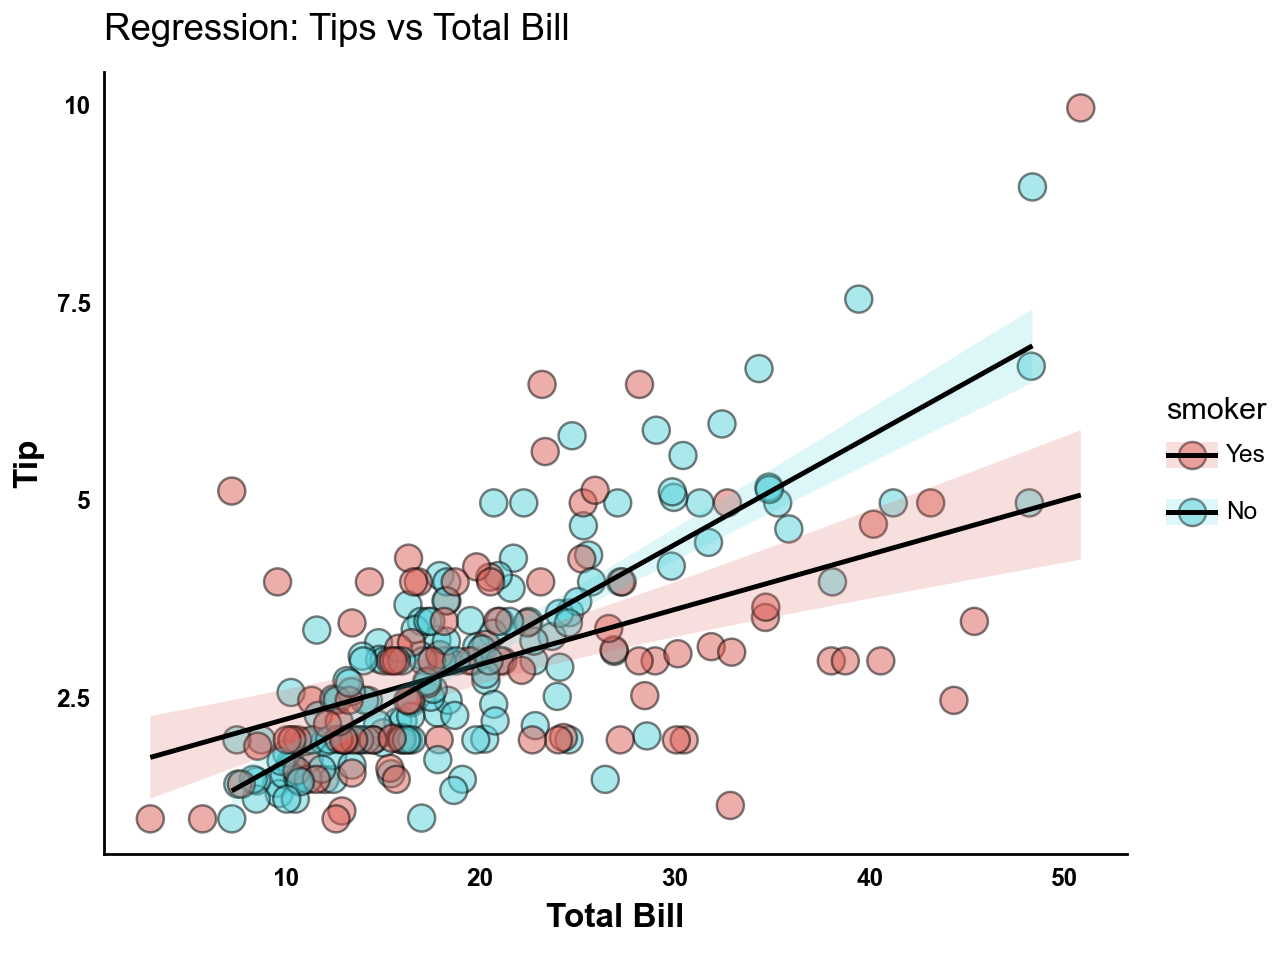

<Figure Size: (640 x 480)>

In [20]:
(tips.tidyplot(x='total_bill', y='tip',fill='smoker')
 .add_scatter(size=5, alpha=0.5, color='black')
 .add_regression_line(ci=True, alpha=0.2)
 .adjust_labels(title='Regression: Tips vs Total Bill',
               x='Total Bill', y='Tip')
 .show())

# 2.10 Quantiles

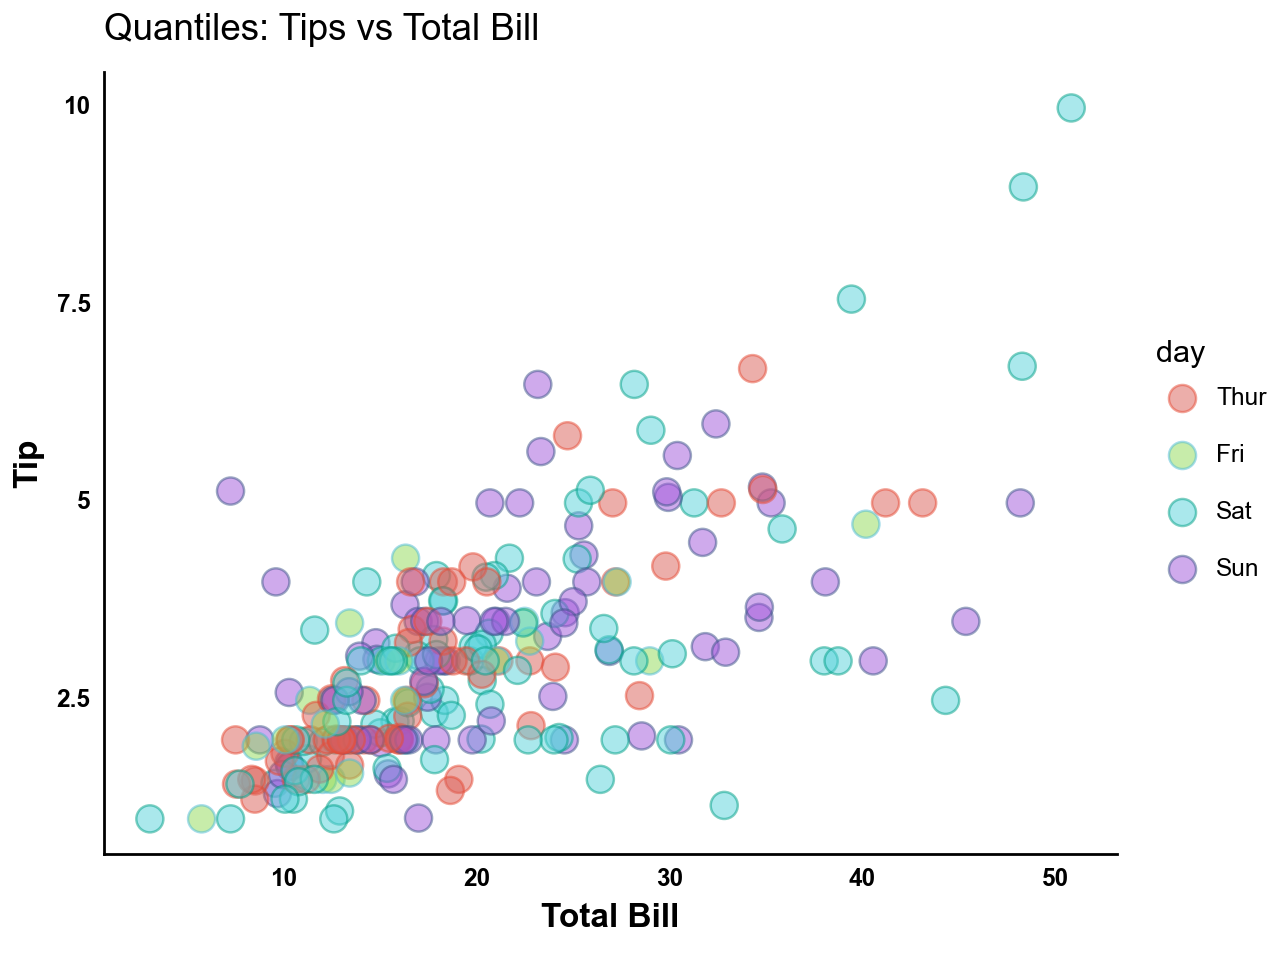

<Figure Size: (640 x 480)>

In [21]:
(tips.tidyplot(x='total_bill', y='tip', fill='day', color='day')
 .add_scatter(size=5, alpha=0.5)
#  .add_quantiles(quantiles=[0.25, 0.5, 0.75], alpha=0.5, color='red')
 .adjust_labels(title='Quantiles: Tips vs Total Bill',
               x='Total Bill', y='Tip')
 .show())

# 3. Distribution Plots

# 3.1 Density 2D Plot

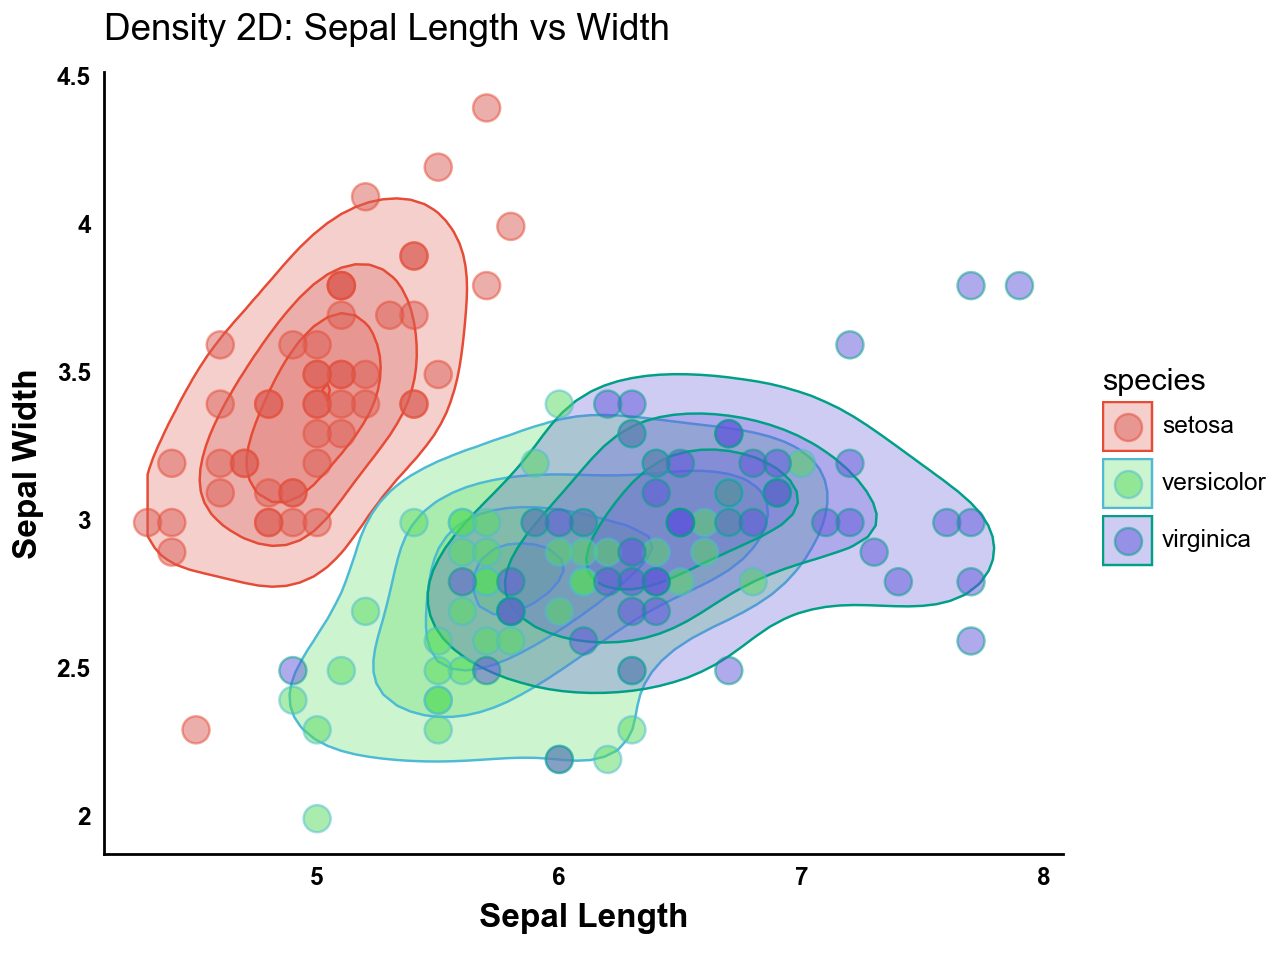

<Figure Size: (640 x 480)>

In [22]:
(iris.tidyplot(x='sepal_length', y='sepal_width', fill='species', color='species')
 .add_density_2d(alpha=0.3)
 .add_scatter(size=5, alpha=0.5)
 .adjust_labels(title='Density 2D: Sepal Length vs Width',
               x='Sepal Length', y='Sepal Width')
 .show())

# 3.4 Rug Plot

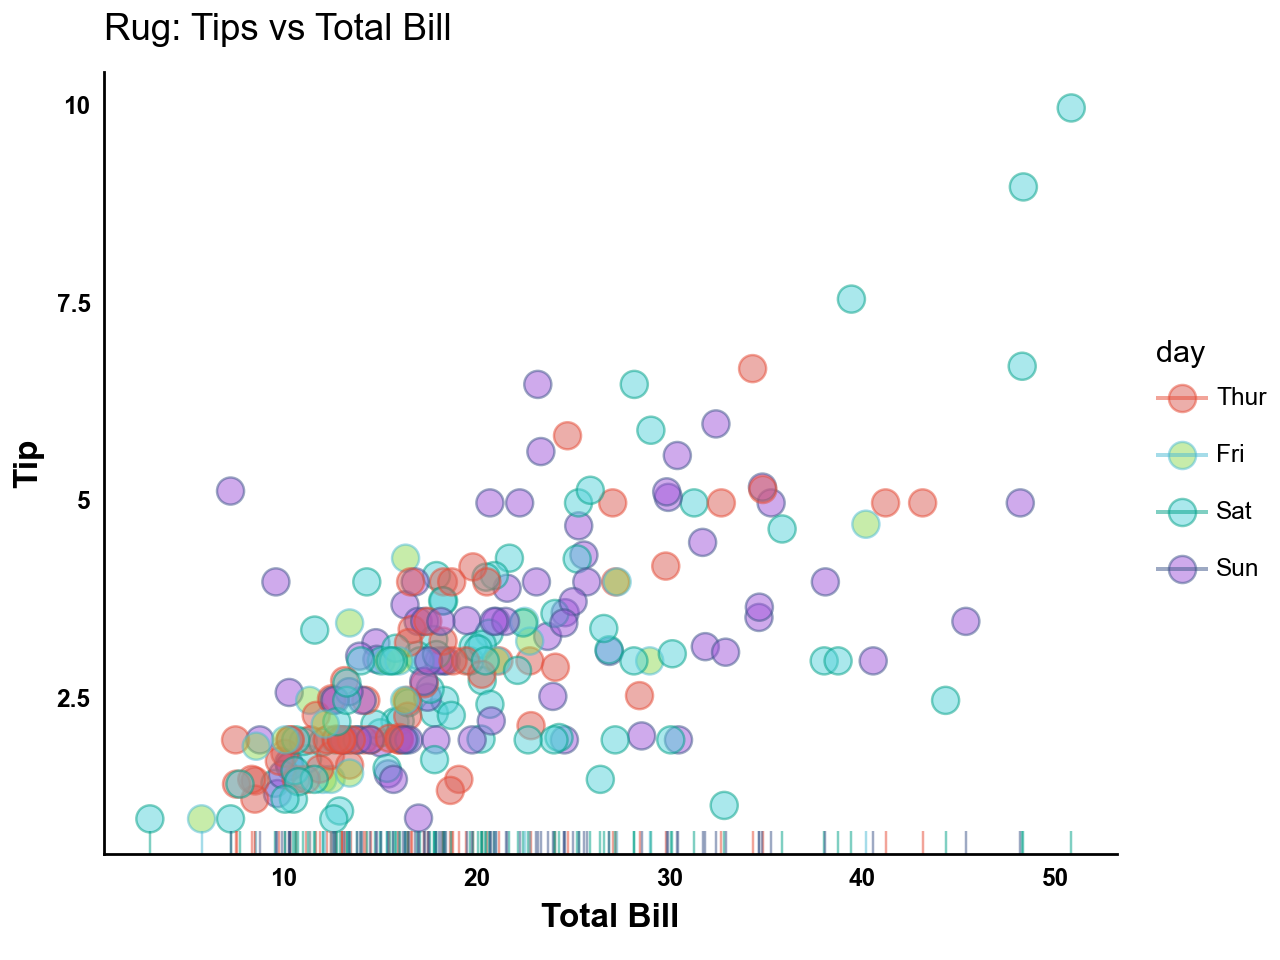

<Figure Size: (640 x 480)>

In [23]:
(tips.tidyplot(x='total_bill', y='tip', fill='day', color='day')
 .add_scatter(size=5, alpha=0.5)
 .add_rug(sides='b', alpha=0.5, length=0.03)
 .adjust_labels(title='Rug: Tips vs Total Bill',
               x='Total Bill', y='Tip')
 .show())

# 3.5 Count Plot

In [24]:
titanic

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alone  
0      man        True  NaN  Southampton    no  False  
1    woman       False    C    Cherbourg   yes  False  
2    woman       False  NaN  Southampton   yes   True  
3    woman       False    C  Southampton   yes  False  
4      man        True  NaN  Southampton    no   True  
..     ...         ...  ...          ...   ...    ...  
886    man        True  NaN  Southampton    no   True  
887  woman       False    B  Southampton   yes   True  
888  woman       False  NaN  Southampton    no  False  
889    man        True    C    Cherbourg   yes   True  
890    man        True  NaN   Queenstown    no   True  

[891 rows x 15 columns]

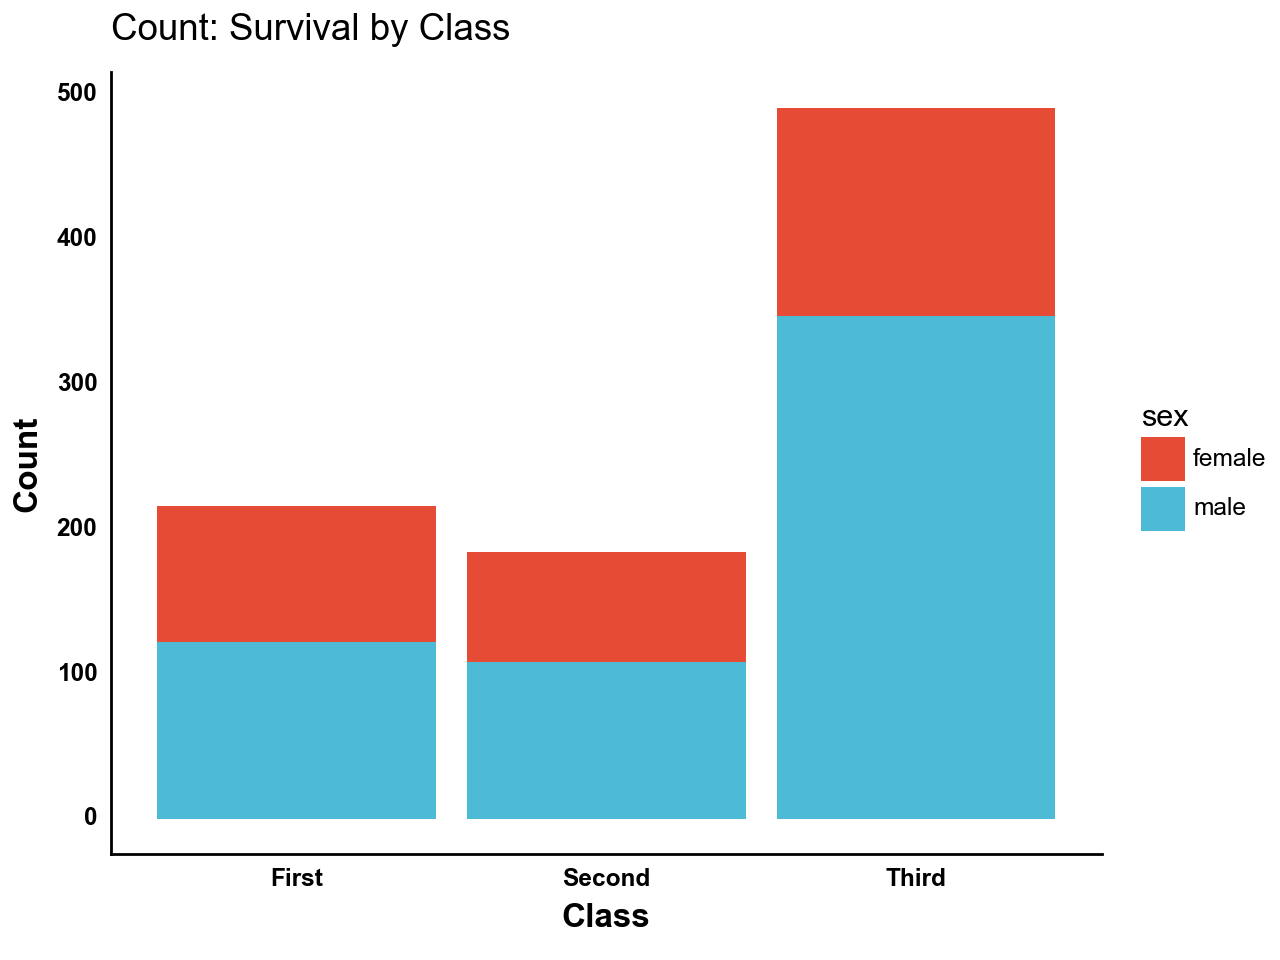

<Figure Size: (640 x 480)>

In [25]:
(titanic.tidyplot(x='class', color='survived', fill='sex')
 .add_count(stat='count', position='stack')
 .adjust_labels(title='Count: Survival by Class',
               x='Class', y='Count')
 .show())

# 4. Data Point Visualizations

# 4.1 Beeswarm

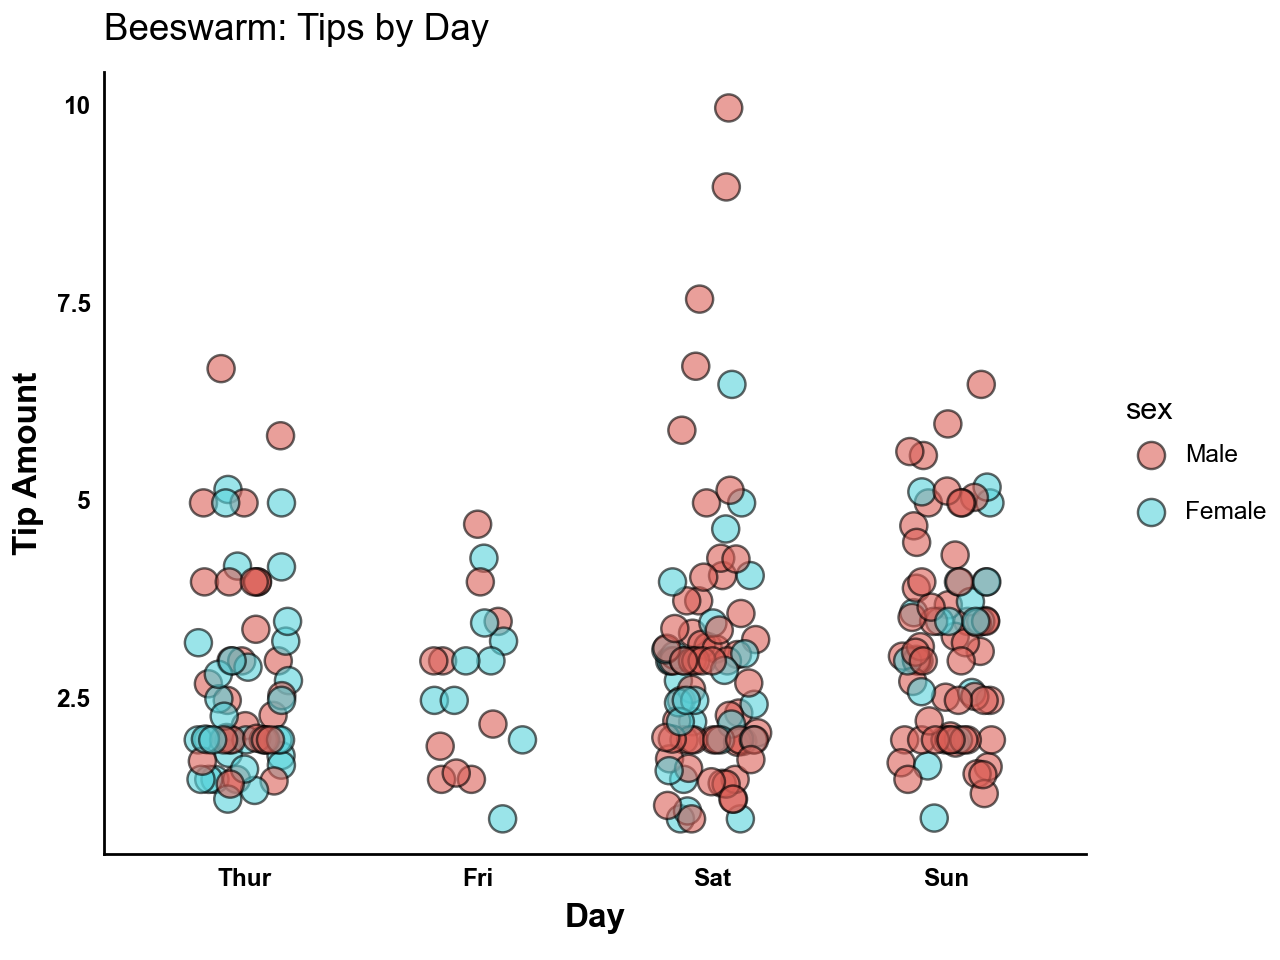

<Figure Size: (640 x 480)>

In [26]:
(tips.tidyplot(x='day', y='tip', fill='sex')
 .add_data_points_beeswarm(size=5, alpha=0.6, color='black')
 .adjust_labels(title='Beeswarm: Tips by Day', x='Day', y='Tip Amount')
 .show())

# 4.2 Jitter

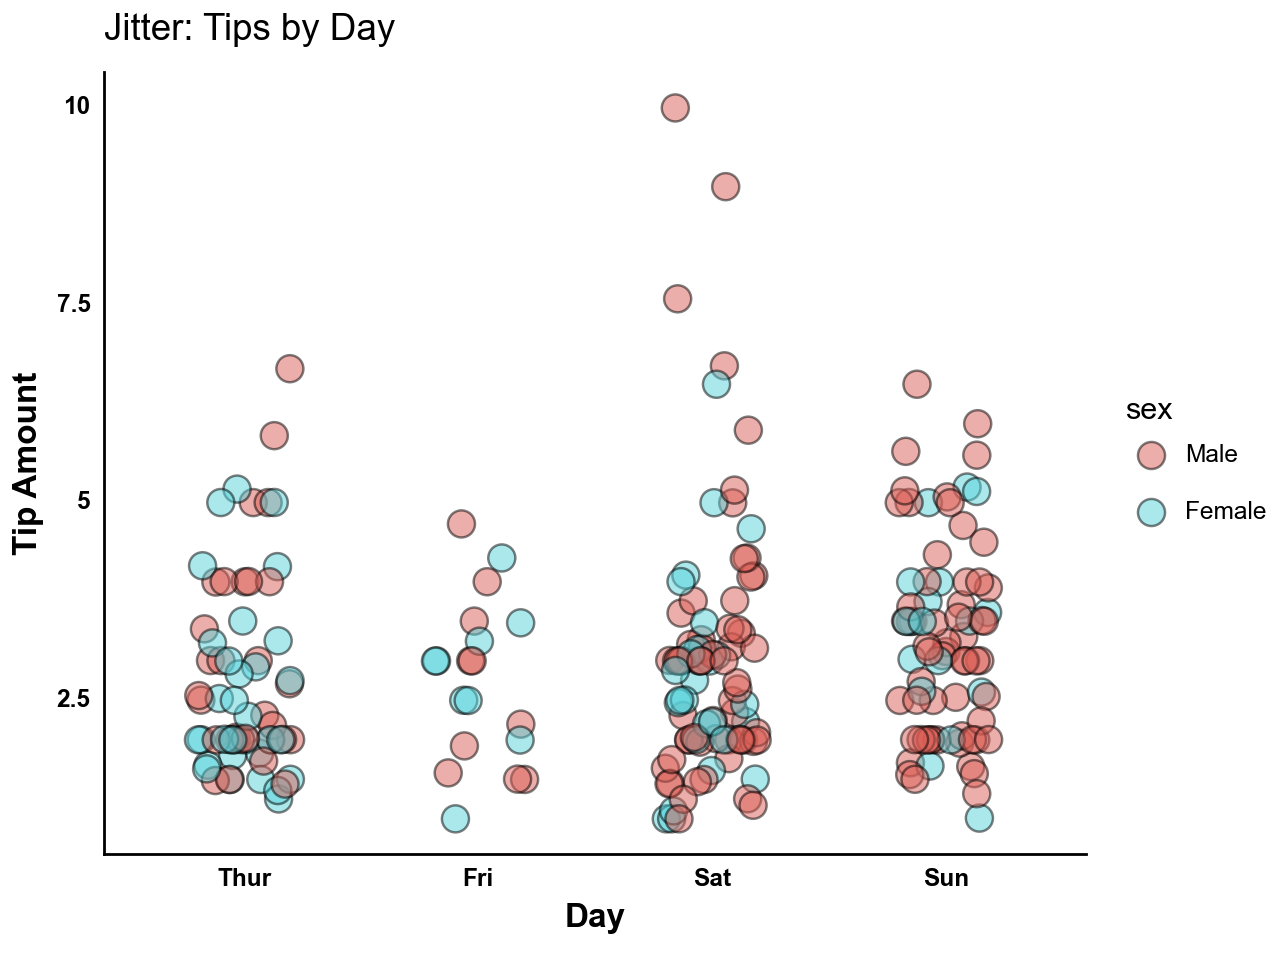

<Figure Size: (640 x 480)>

In [27]:
(tips.tidyplot(x='day', y='tip', fill='sex')
 .add_data_points_jitter(width=0.2, size=5, alpha=0.5)
 .adjust_labels(title='Jitter: Tips by Day', x='Day', y='Tip Amount')
 .show())

# 5. Reference Lines and Annotations

# 5.1 Horizontal Line

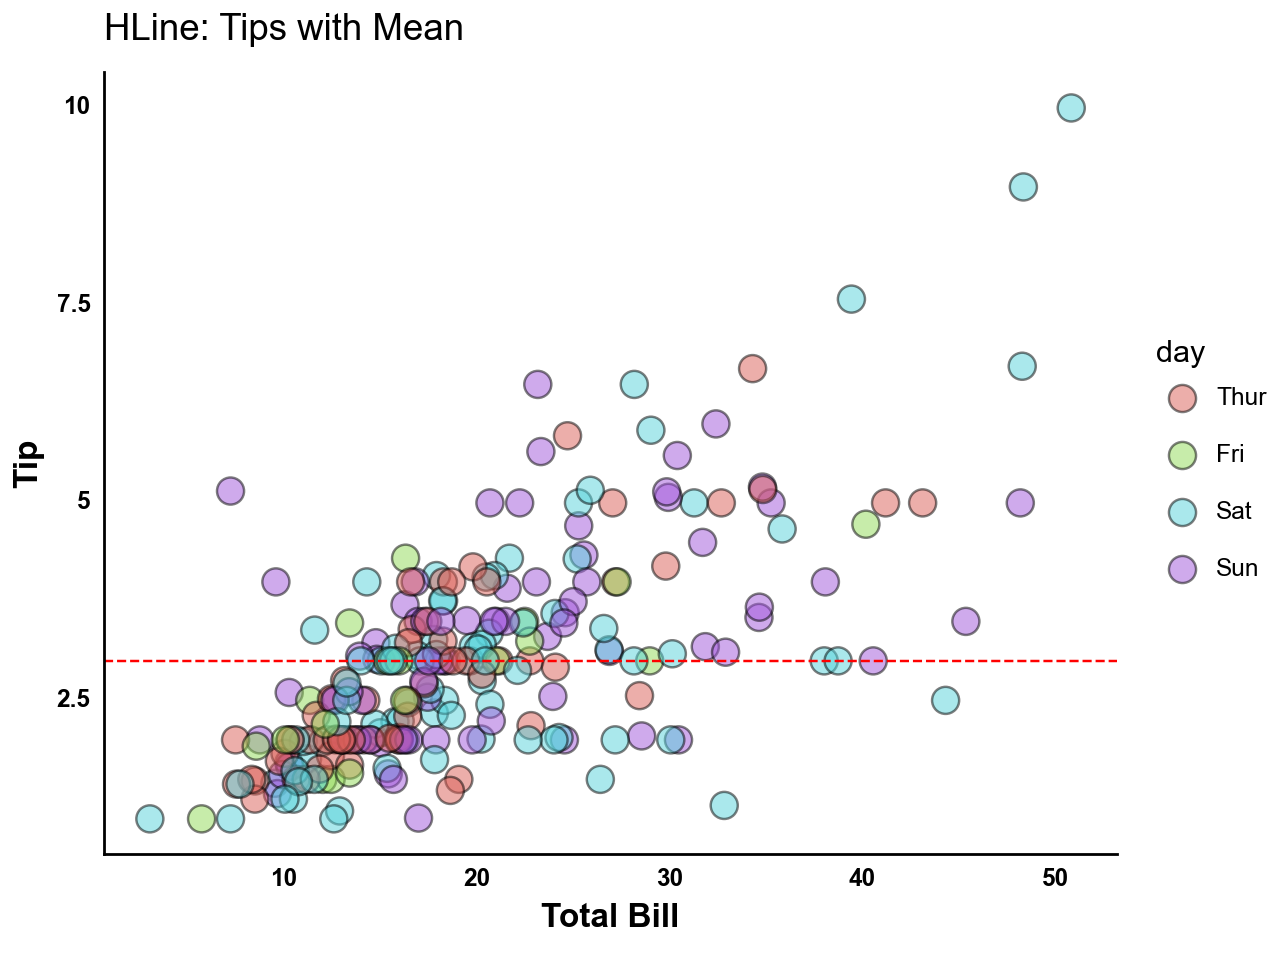

<Figure Size: (640 x 480)>

In [28]:
mean_tip = tips['tip'].mean()
(tips.tidyplot(x='total_bill', y='tip', fill='day')
 .add_scatter(size=5, alpha=0.5)
 .add_hline(yintercept=mean_tip, linetype='dashed', color='red', alpha=1.0)
 .adjust_labels(title='HLine: Tips with Mean', x='Total Bill', y='Tip')
 .show())

# 5.2 Vertical Line

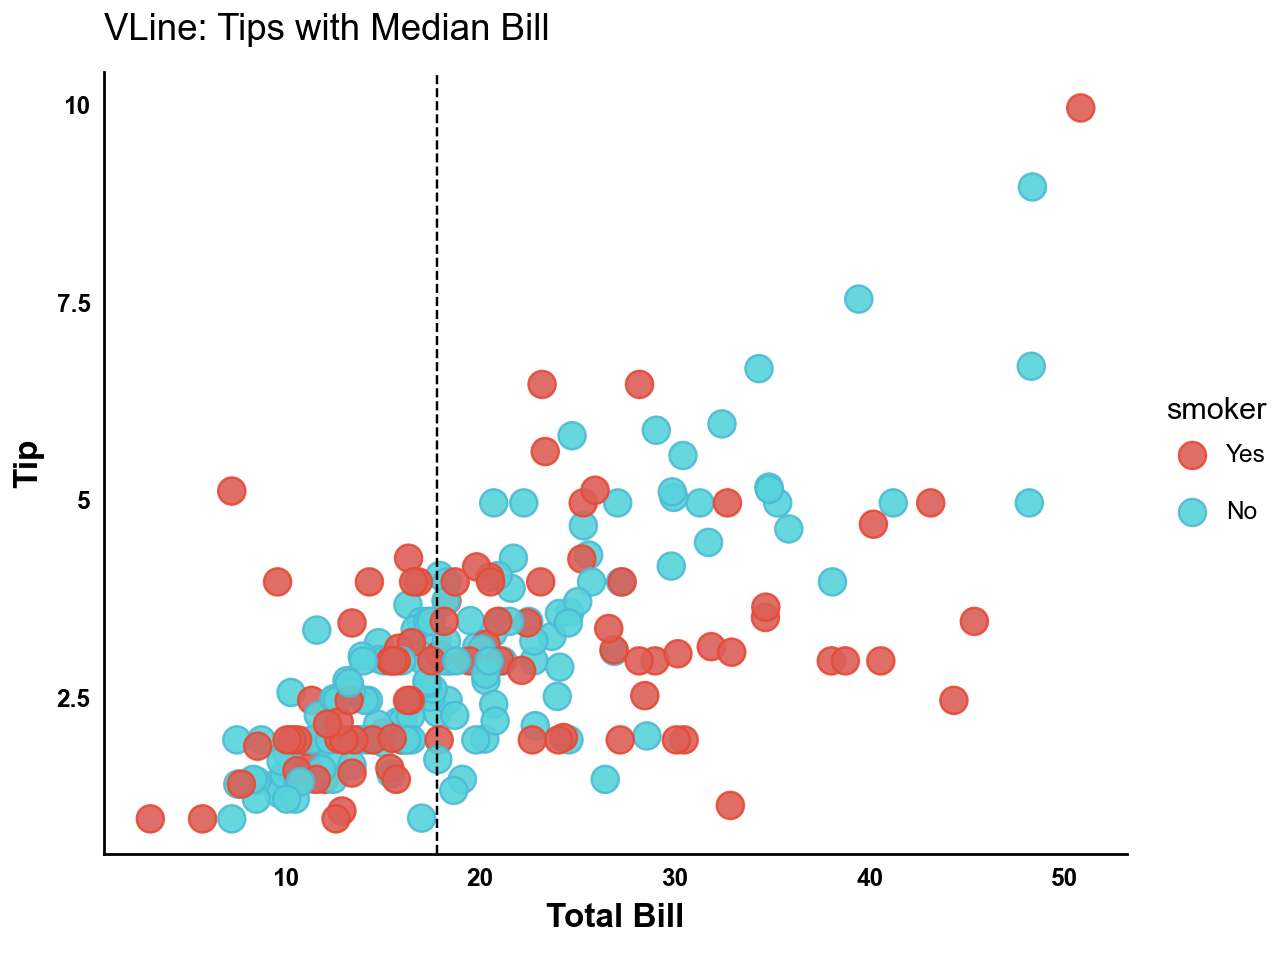

<Figure Size: (640 x 480)>

In [29]:
median_bill = tips['total_bill'].median()
(tips.tidyplot(x='total_bill', y='tip', fill='smoker', color="smoker")
 .add_scatter(size=5, alpha=0.9)
 .add_vline(xintercept=median_bill, linetype='dashed', color='black', alpha=1.0)
 .adjust_labels(title='VLine: Tips with Median Bill',
               x='Total Bill', y='Tip')
 .show())

# 5.3 Text Annotation

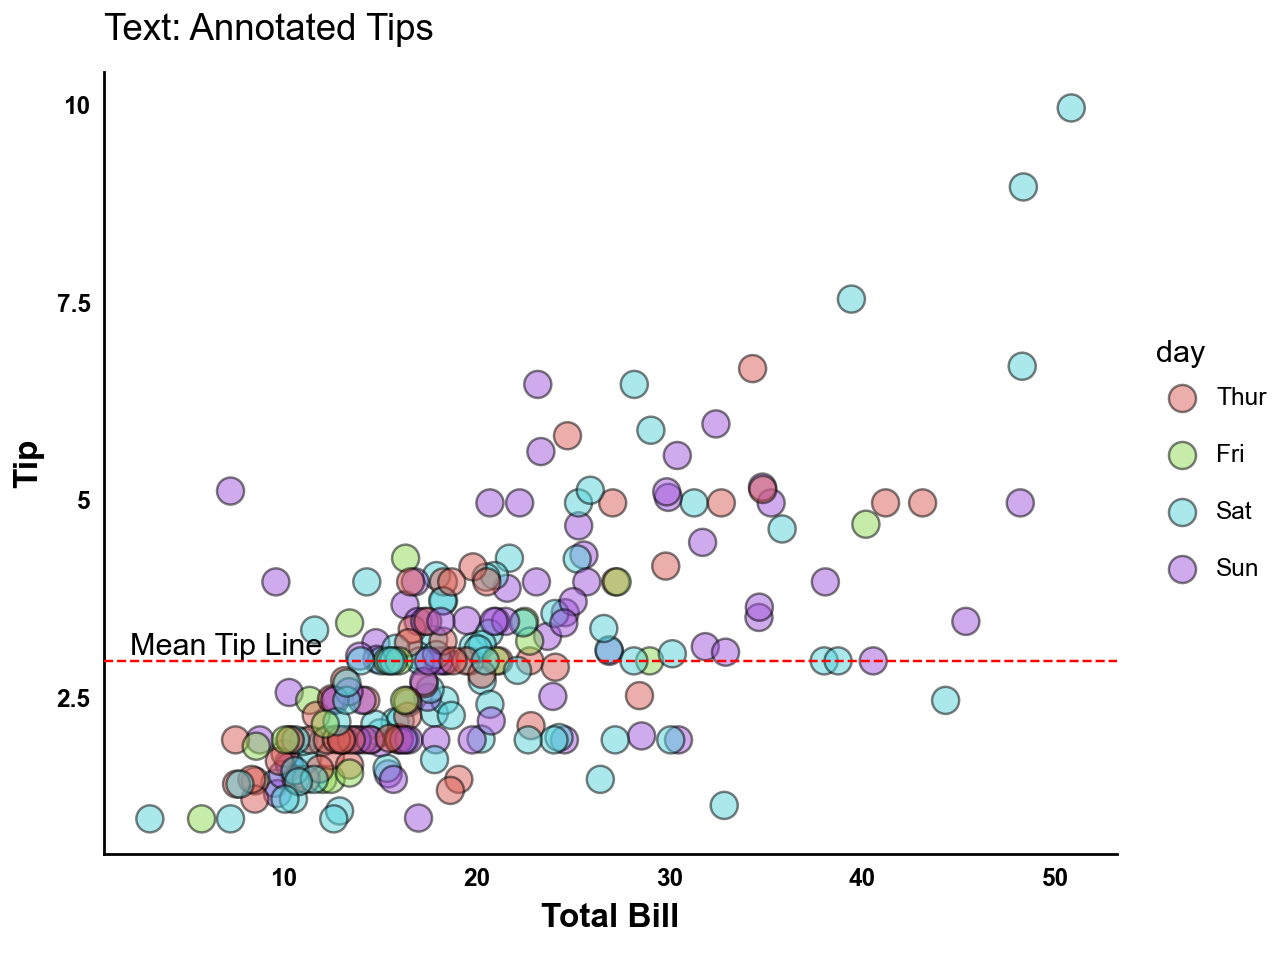

<Figure Size: (640 x 480)>

In [30]:
(tips.tidyplot(x='total_bill', y='tip', fill='day')
 .add_scatter(size=5, alpha=0.5)
 .add_text(label='Mean Tip Line', x=12, y=mean_tip,
          ha='right', va='bottom', size=11)
 .add_hline(yintercept=mean_tip, linetype='dashed', color='red')
 .adjust_labels(title='Text: Annotated Tips', x='Total Bill', y='Tip')
 .show())

# 5.4 Ribbon

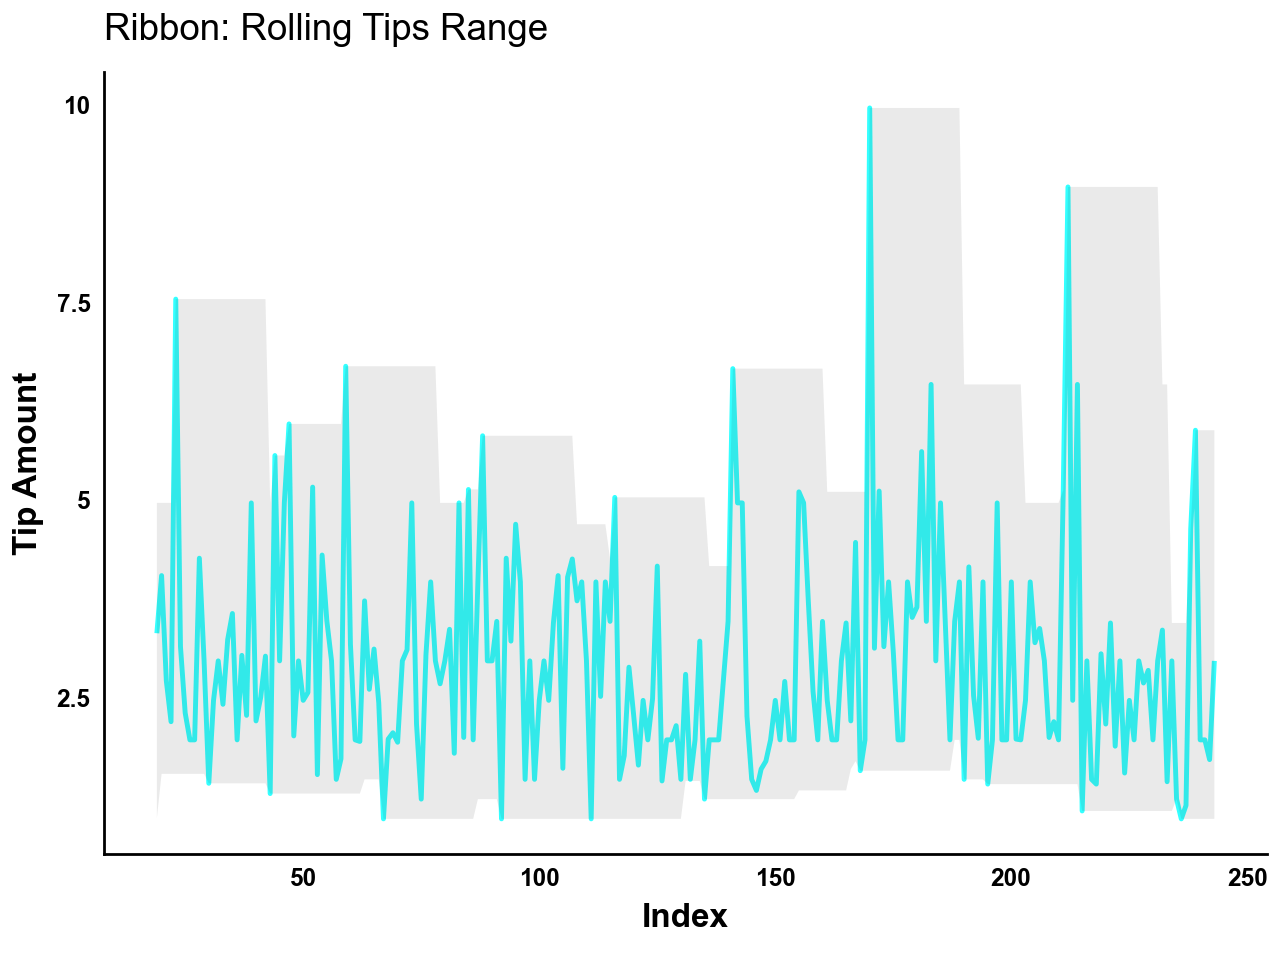

<Figure Size: (640 x 480)>

In [31]:
tips_rolling = pd.DataFrame({
    'x': range(len(tips)),
    'y': tips['tip'],#.rolling(10).mean(),
    'ymin': tips['tip'].rolling(20).min(),
    'ymax': tips['tip'].rolling(20).max()
}).dropna()
(tips_rolling.tidyplot(x='x', y='y')
 .add_line(size=1, alpha=.8, color='cyan')
 .add_ribbon(ymin='ymin', ymax='ymax', alpha=0.1)
 .adjust_labels(title='Ribbon: Rolling Tips Range', x='Index', y='Tip Amount')
 .show())

# Test all customization methods

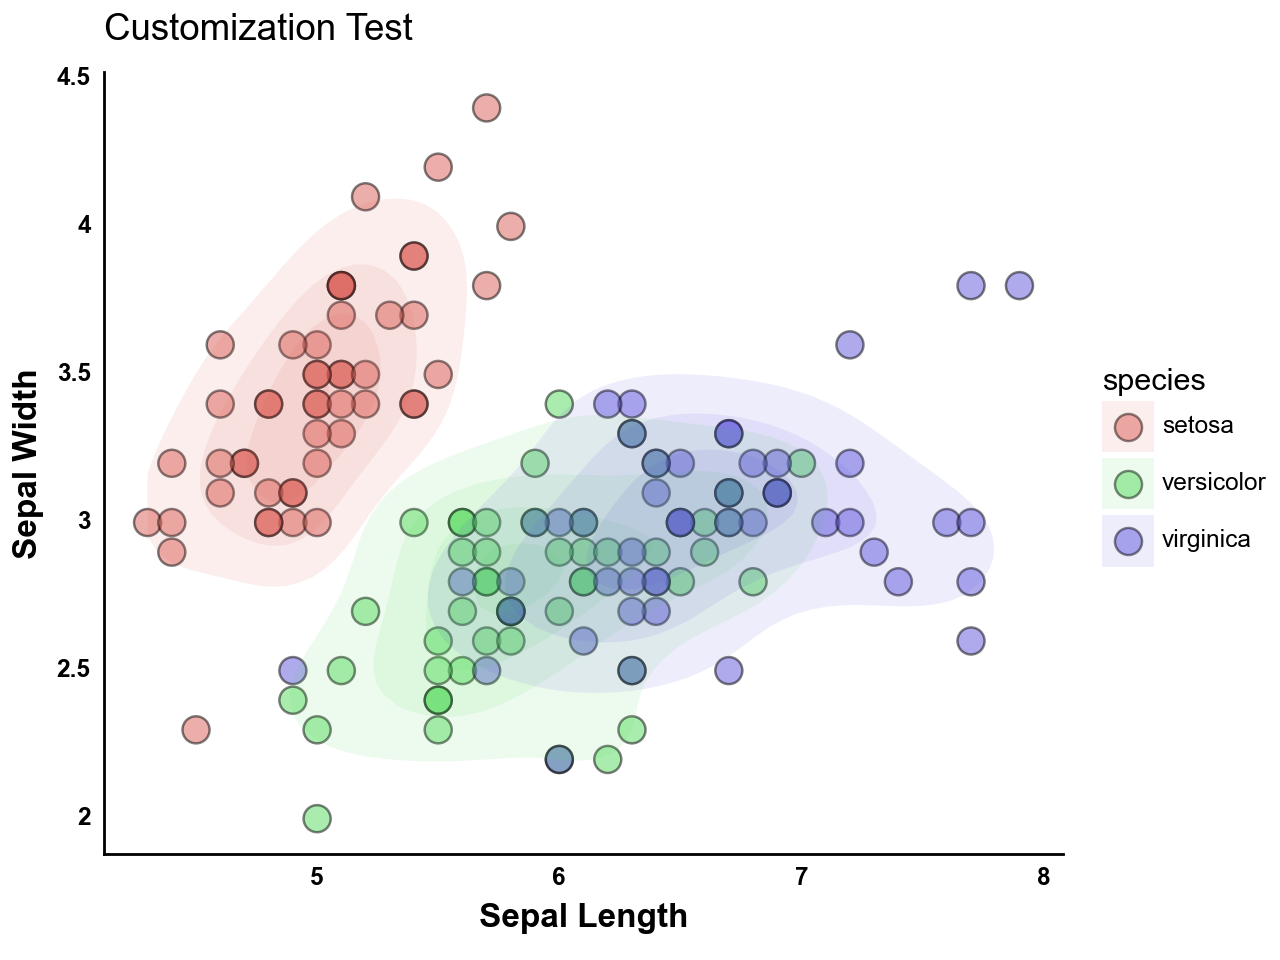

<Figure Size: (640 x 480)>

In [32]:
(iris.tidyplot(x='sepal_length', y='sepal_width', fill='species')
 .add_scatter(size=5, alpha=0.5)
 .add_density_2d(alpha=0.1)
 .adjust_labels(title='Customization Test',
               x='Sepal Length', y='Sepal Width')
 .adjust_colors(['#1f77b4', '#ff7f0e', '#2ca02c'])
 .adjust_legend_position('right')
 .show())

# Same plot with removed legend

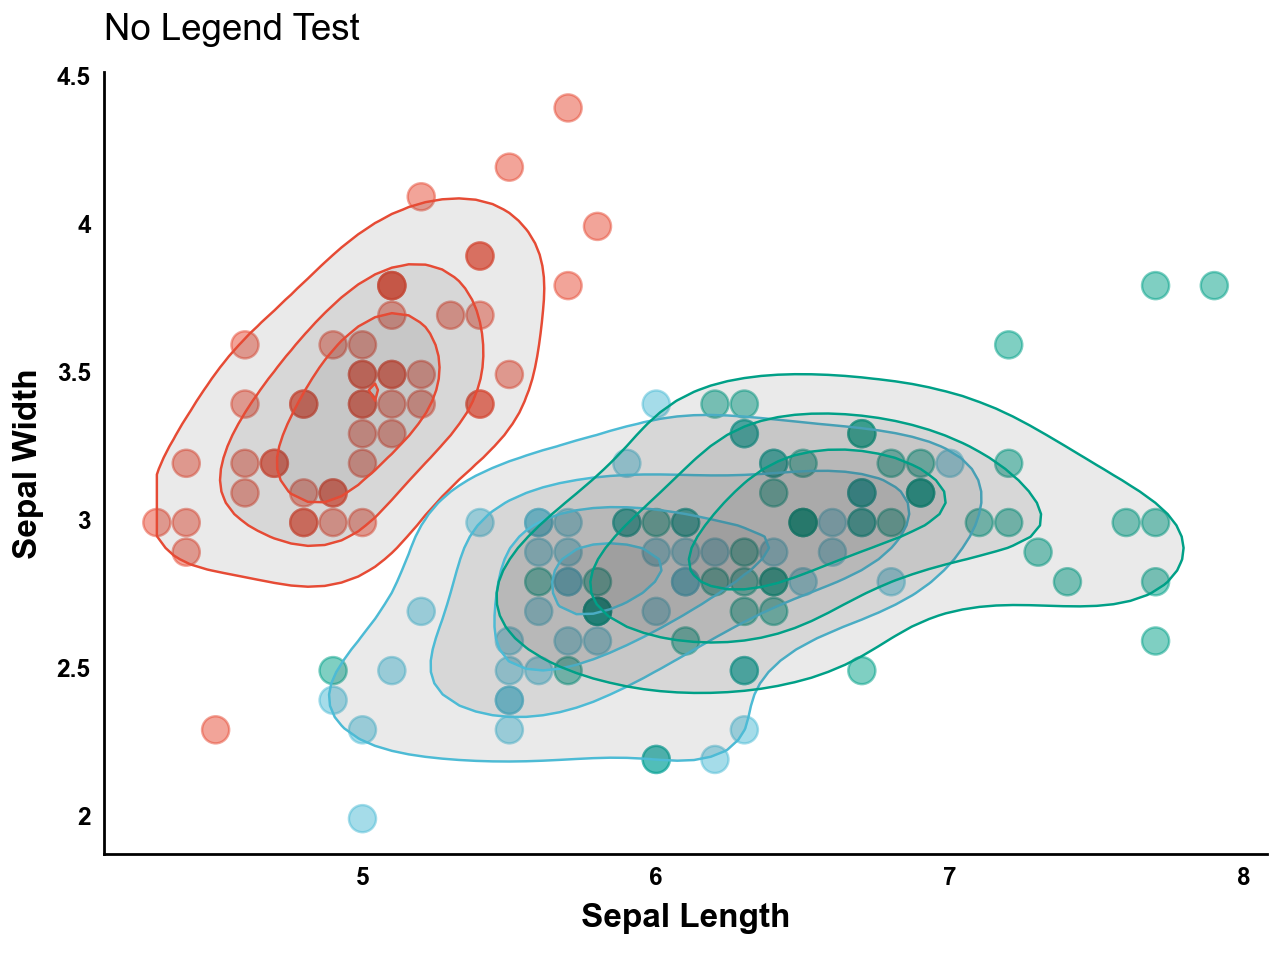

<Figure Size: (640 x 480)>

In [33]:
(iris.tidyplot(x='sepal_length', y='sepal_width', color ='species')
 .add_scatter(size=5, alpha=0.5)
 .add_density_2d(alpha=0.1)
 .adjust_labels(title='No Legend Test', x='Sepal Length', y='Sepal Width')
 .remove_legend()
 .show())

# Test adjust_axis_text_angle with long category names

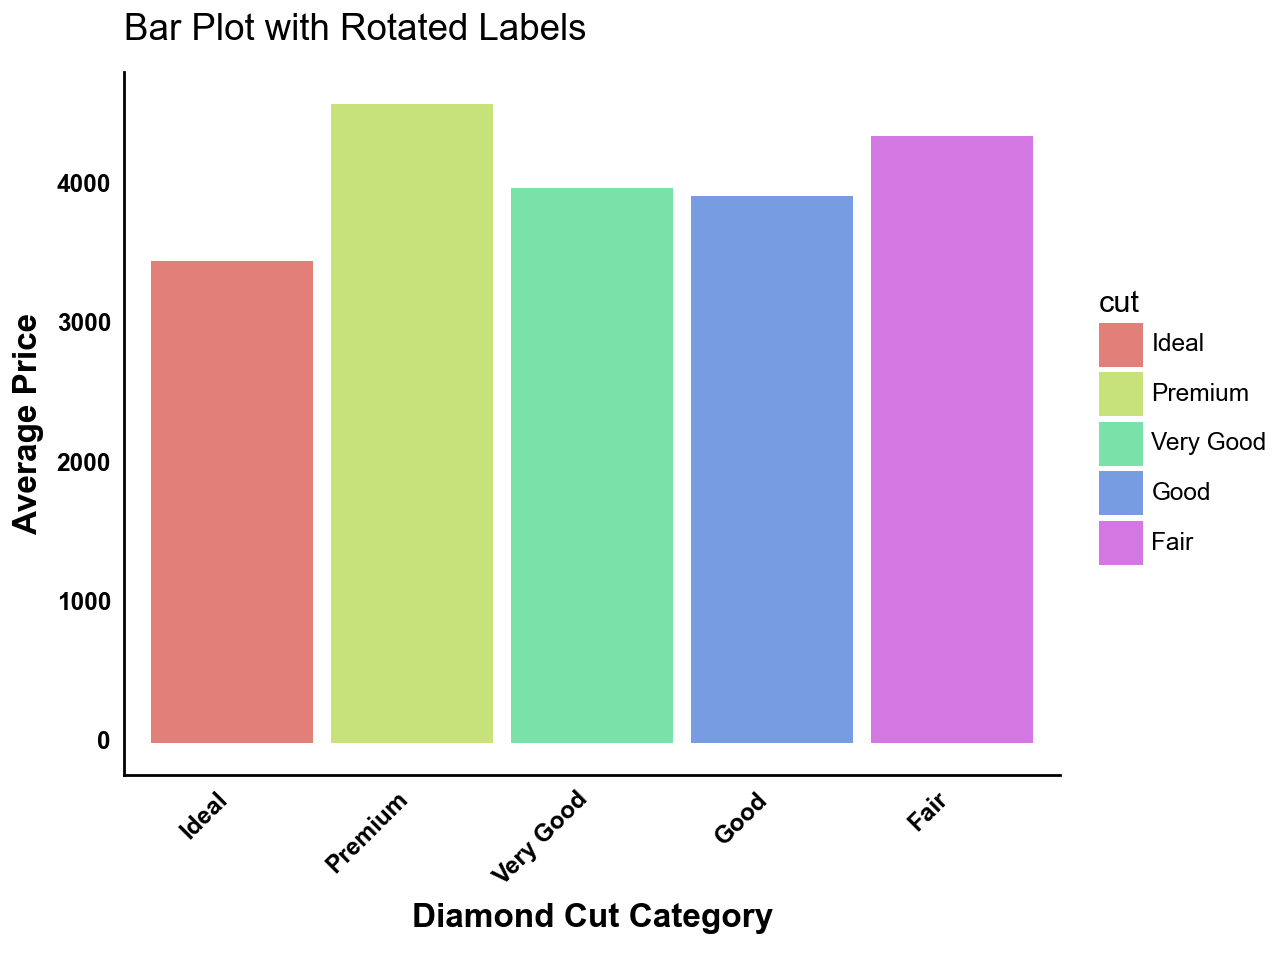

<Figure Size: (640 x 480)>

In [34]:
diamonds_cut = diamonds.groupby('cut', observed=True)['price'].mean().reset_index()
(diamonds_cut.tidyplot(x='cut', y='price', fill='cut')
 .add_bar(stat='identity', alpha=.8)
 .adjust_labels(title='Bar Plot with Rotated Labels', x='Diamond Cut Category', y='Average Price')
 .adjust_axis_text_angle(45)
 .adjust_colors("Set1")
 .show())

# 3. Sum Functions

In [35]:
print("\nTesting sum functions...")


Testing sum functions...


# Group tips by day

/Users/yin/miniconda3/envs/rtb/lib/python3.9/site-packages/plotnine/geoms/geom_path.py:111: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?


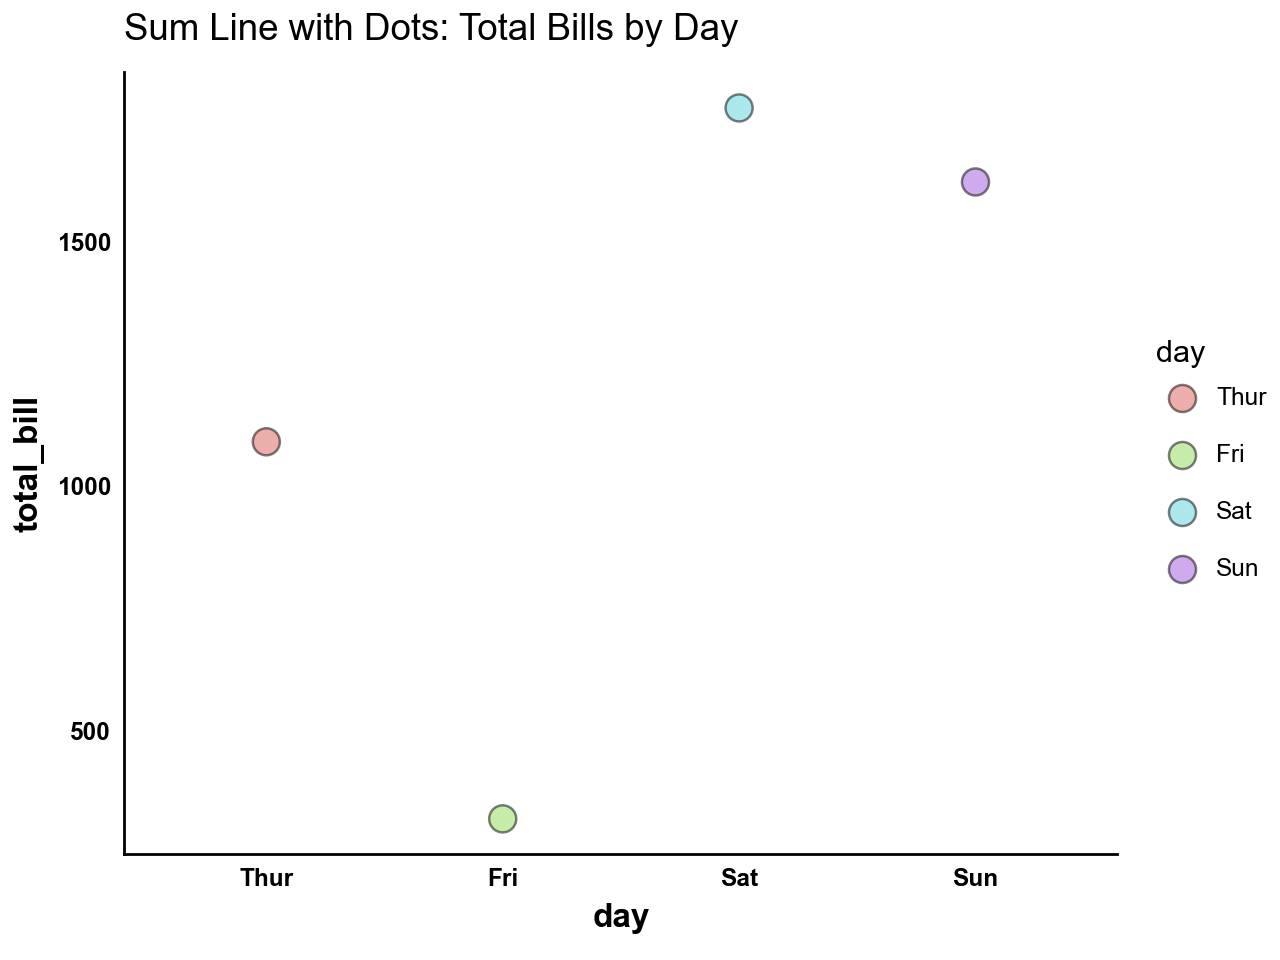

<Figure Size: (640 x 480)>

In [36]:
tips_by_day = tips.groupby('day', observed=True)['total_bill'].sum().reset_index()
(tips_by_day.tidyplot(x='day', y='total_bill', fill='day')
 .add_sum_line()
 .add_sum_dot(size=5, alpha=0.5)
 .adjust_labels(title='Sum Line with Dots: Total Bills by Day')
 .show())

# 4. Median Functions

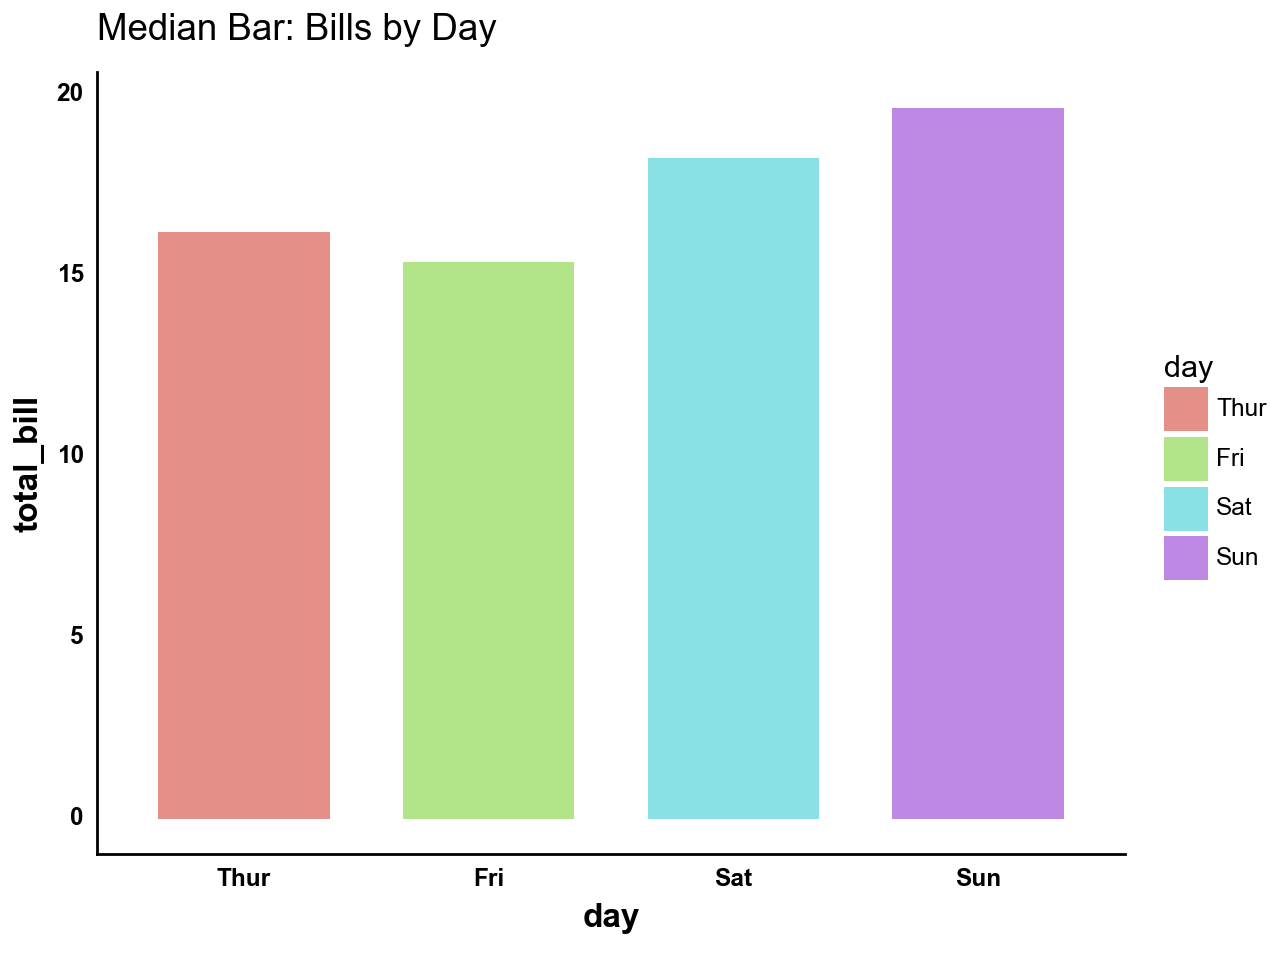

<Figure Size: (640 x 480)>

In [37]:
tips_median = tips.groupby('day', observed=True)['total_bill'].median().reset_index()
(tips_median.tidyplot(x='day', y='total_bill', fill='day')
 .add_median_bar()
 .adjust_labels(title='Median Bar: Bills by Day')
 .show())


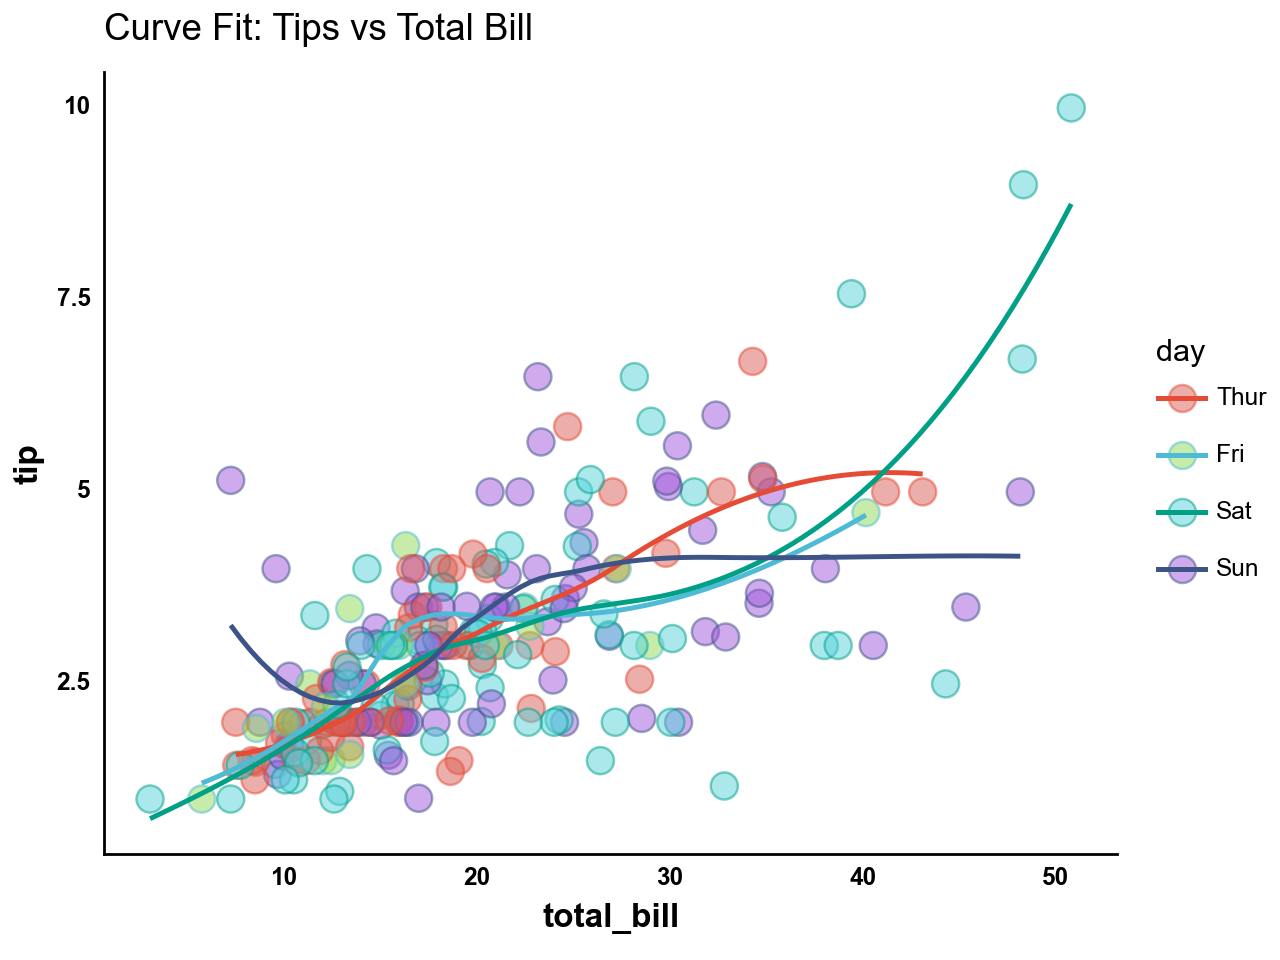

<Figure Size: (640 x 480)>

In [38]:
(tips.tidyplot(x='total_bill', y='tip', fill='day', color='day')
 .add_scatter(size=5, alpha=0.5)
 .add_curve_fit()
 .adjust_labels(title='Curve Fit: Tips vs Total Bill')
 .show())

# 5. Ribbon Functions

In [39]:
print("\nTesting ribbon functions...")


Testing ribbon functions...


# Create time series data

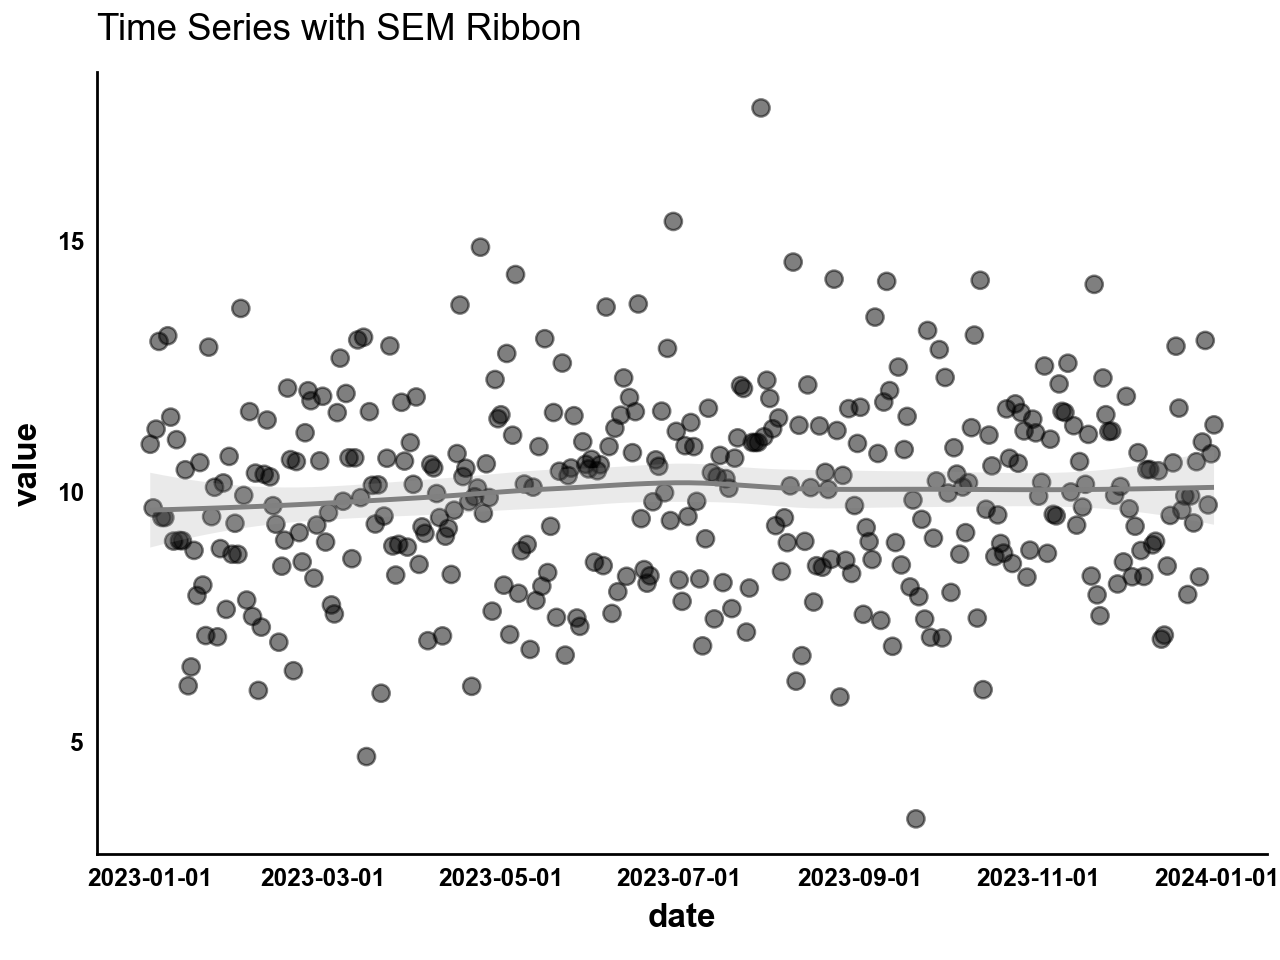

<Figure Size: (640 x 480)>

In [40]:
np.random.seed(42)
dates = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')
values = np.random.normal(loc=10, scale=2, size=len(dates))
ts_data = pd.DataFrame({'date': dates, 'value': values})
(ts_data.tidyplot(x='date', y='value')
#  .add_line(alpha=0.2)
 .add_scatter(size=3, alpha=0.5)
 .add_sem_ribbon()
 .adjust_labels(title='Time Series with SEM Ribbon')
 .show())


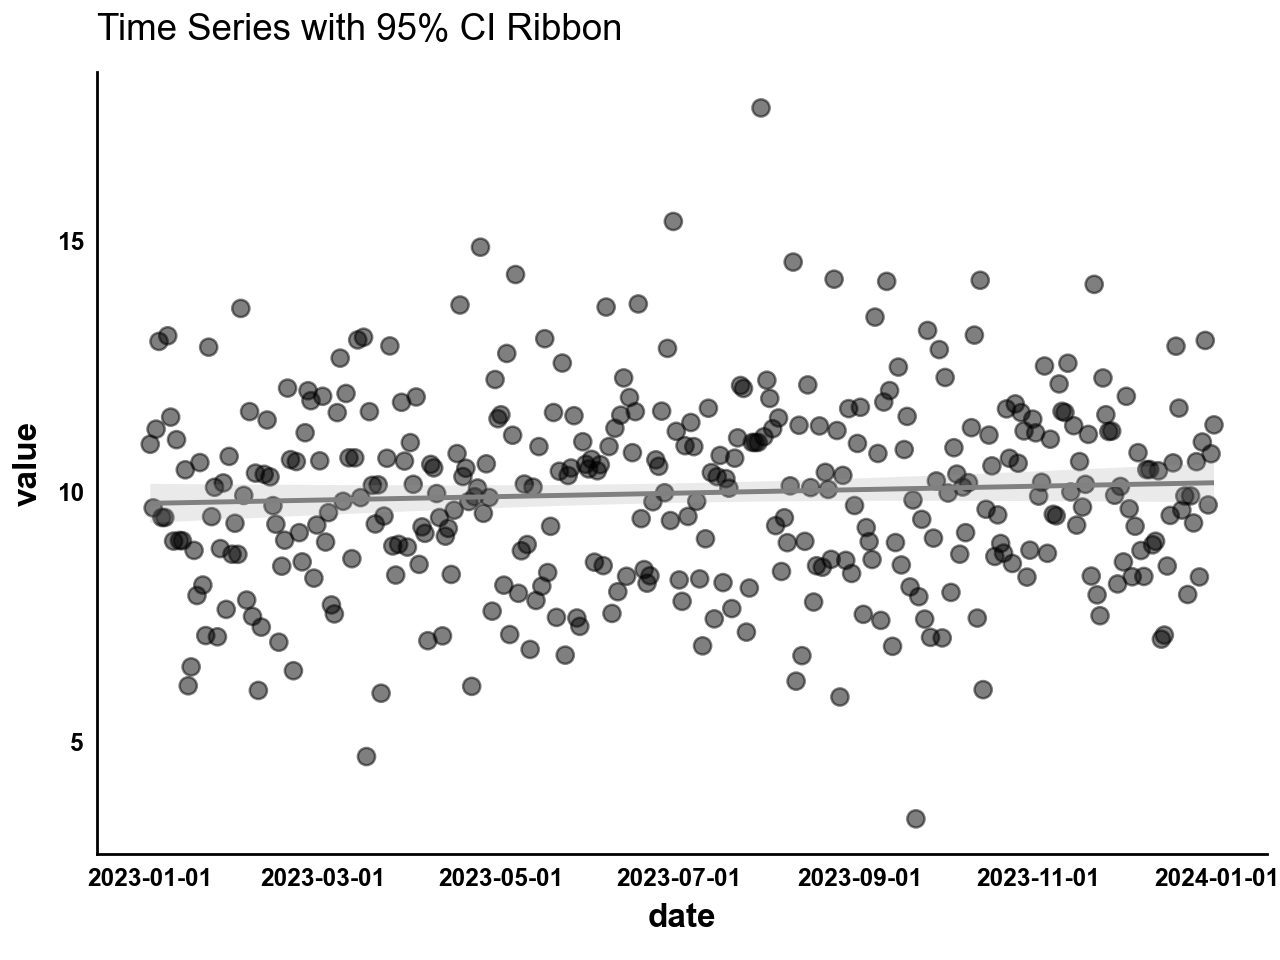

<Figure Size: (640 x 480)>

In [41]:
(ts_data.tidyplot(x='date', y='value')
#  .add_line(alpha=0.2)
 .add_scatter(size=3, alpha=0.5)
 .add_ci95_ribbon()
 .adjust_labels(title='Time Series with 95% CI Ribbon')
 .show())

# 6. Stack Functions

In [42]:
print("\nTesting stack functions...")


Testing stack functions...


# Calculate survival rates by class

In [43]:
titanic_class = (titanic.groupby(['class', 'survived'], observed=True)
                 .size()
                 .unstack()
                 .fillna(0))
titanic_class.columns = ['Not Survived', 'Survived']
titanic_class = titanic_class.reset_index()

# Calculate percentages

In [44]:
total = titanic_class['Not Survived'] + titanic_class['Survived']
titanic_class['Survived %'] = titanic_class['Survived'] / total * 100
titanic_class['Not Survived %'] = titanic_class['Not Survived'] / total * 100

# Melt for plotting

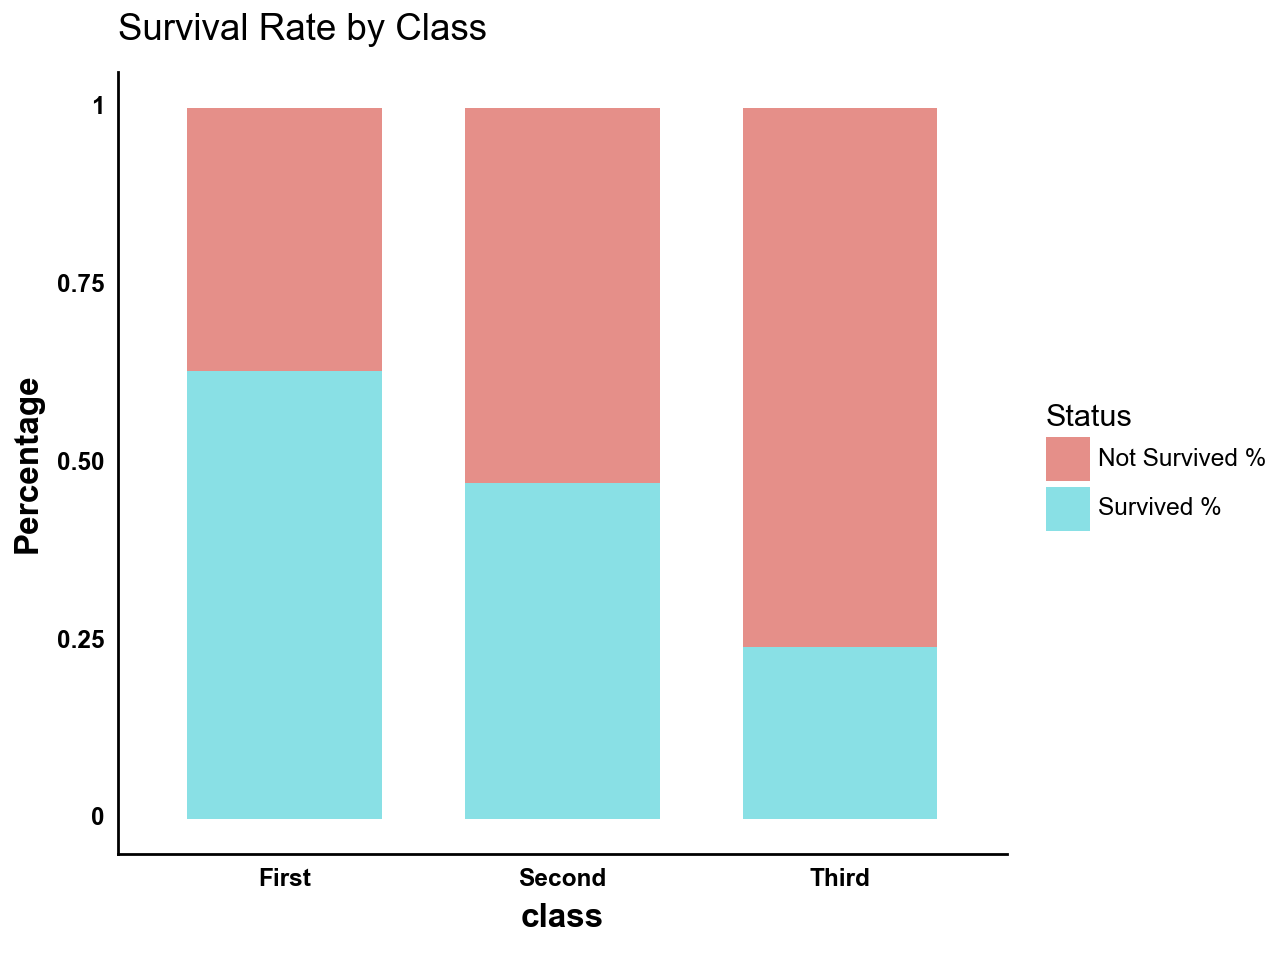

<Figure Size: (640 x 480)>

In [45]:
titanic_relative = pd.melt(titanic_class, 
                          id_vars=['class'],
                          value_vars=['Survived %', 'Not Survived %'],
                          var_name='Status',
                          value_name='Percentage')
titanic_absolute = pd.melt(titanic_class,
                          id_vars=['class'],
                          value_vars=['Survived', 'Not Survived'],
                          var_name='Status',
                          value_name='Count')
(titanic_relative.tidyplot(x='class', y='Percentage', fill='Status')
 .add_barstack_relative()
 .adjust_labels(title='Survival Rate by Class',
               y='Percentage')
 .show())


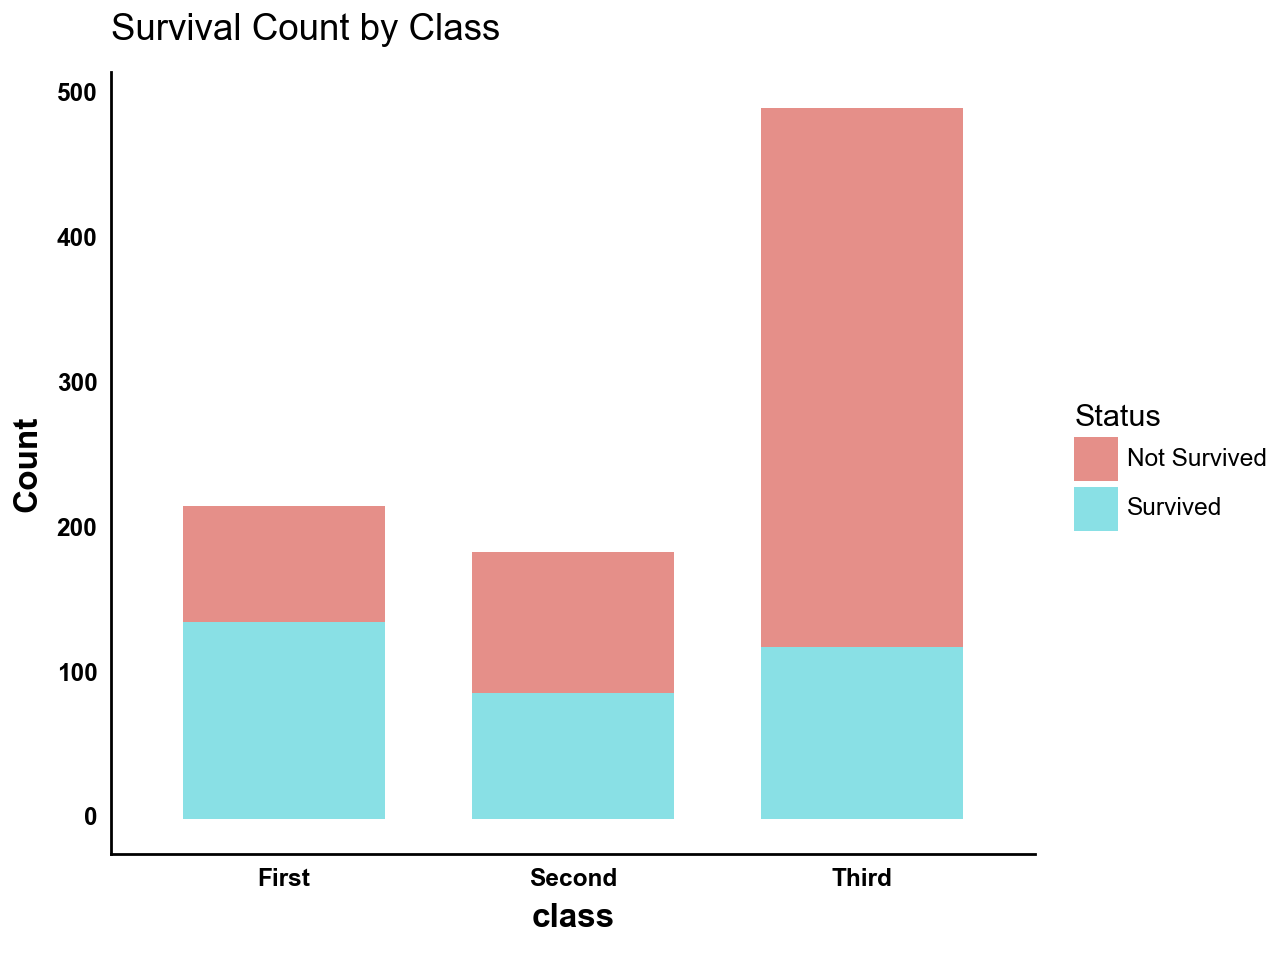

<Figure Size: (640 x 480)>

In [46]:
(titanic_absolute.tidyplot(x='class', y='Count', fill='Status')
 .add_barstack_absolute()
 .adjust_labels(title='Survival Count by Class', y='Count')
 .show())

# 7. Pie and Donut Charts

In [47]:
titanic

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alone  
0      man        True  NaN  Southampton    no  False  
1    woman       False    C    Cherbourg   yes  False  
2    woman       False  NaN  Southampton   yes   True  
3    woman       False    C  Southampton   yes  False  
4      man        True  NaN  Southampton    no   True  
..     ...         ...  ...          ...   ...    ...  
886    man        True  NaN  Southampton    no   True  
887  woman       False    B  Southampton   yes   True  
888  woman       False  NaN  Southampton    no  False  
889    man        True    C    Cherbourg   yes   True  
890    man        True  NaN   Queenstown    no   True  

[891 rows x 15 columns]

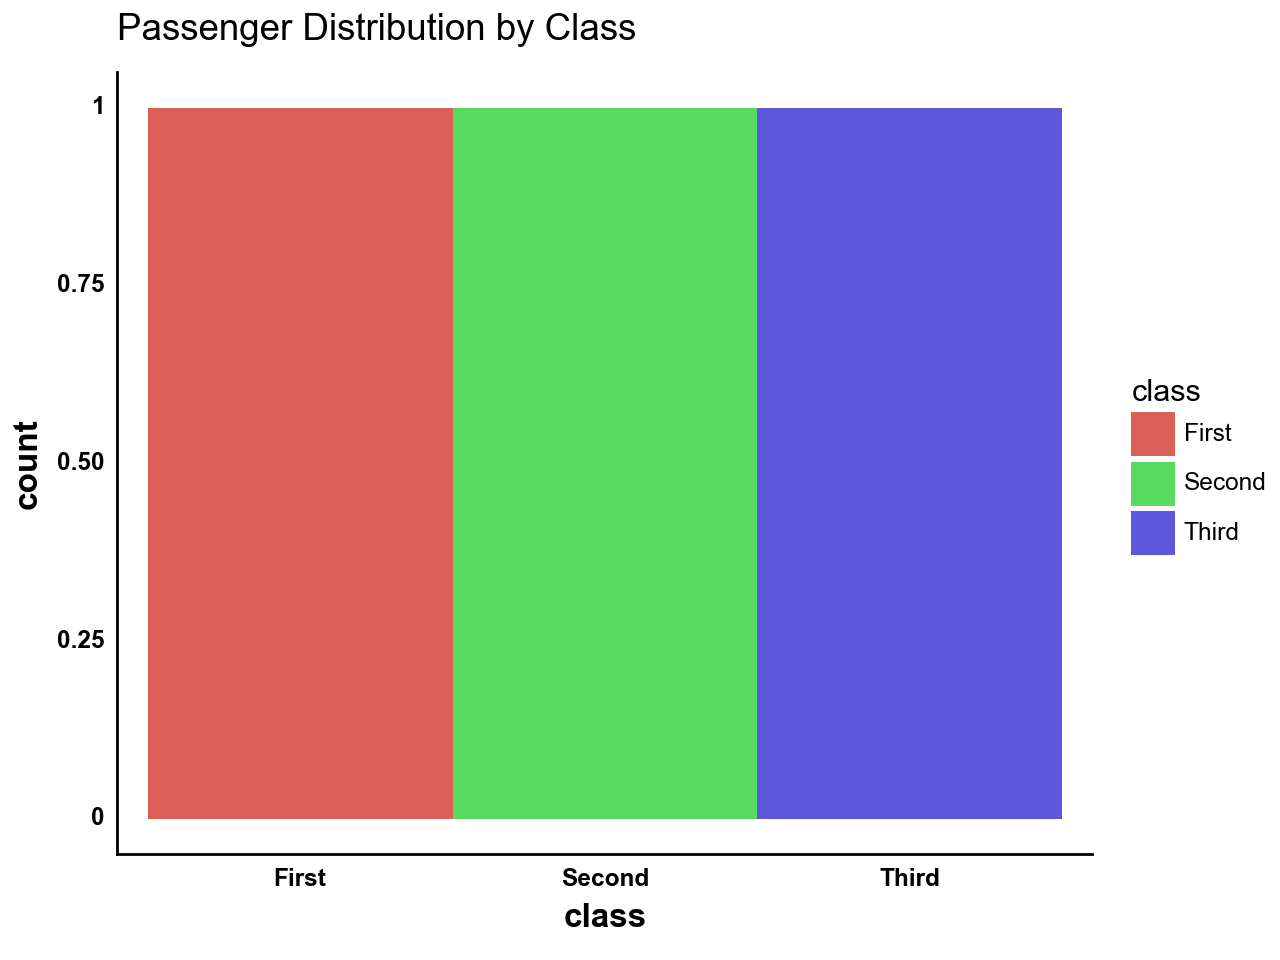

<Figure Size: (640 x 480)>

In [48]:
# print("\nTesting pie and donut charts...")
class_counts = titanic['class'].value_counts().reset_index()
class_counts.columns = ['class', 'count']
(class_counts.tidyplot(x='class', y='count', fill='class')
 .add_pie()
 .adjust_labels(title='Passenger Distribution by Class')
 .show())


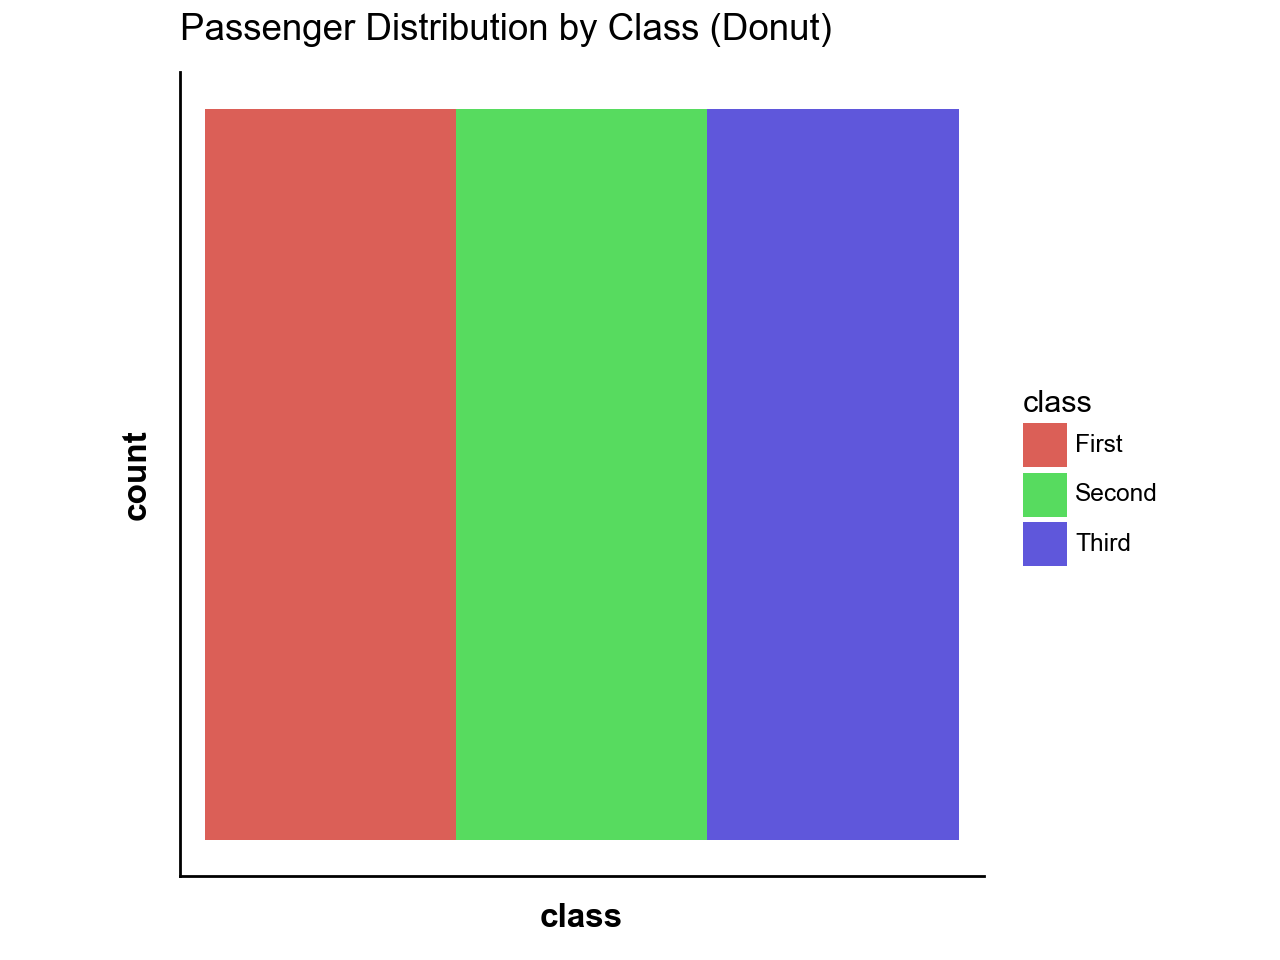

<Figure Size: (640 x 480)>

In [49]:
(class_counts.tidyplot(x='class', y='count', fill='class')
 .add_donut()
 .adjust_labels(title='Passenger Distribution by Class (Donut)')
 .show())

# 8. Advanced Label Management

In [50]:
print("\nTesting label management functions...")


Testing label management functions...


# Sort diamonds by price

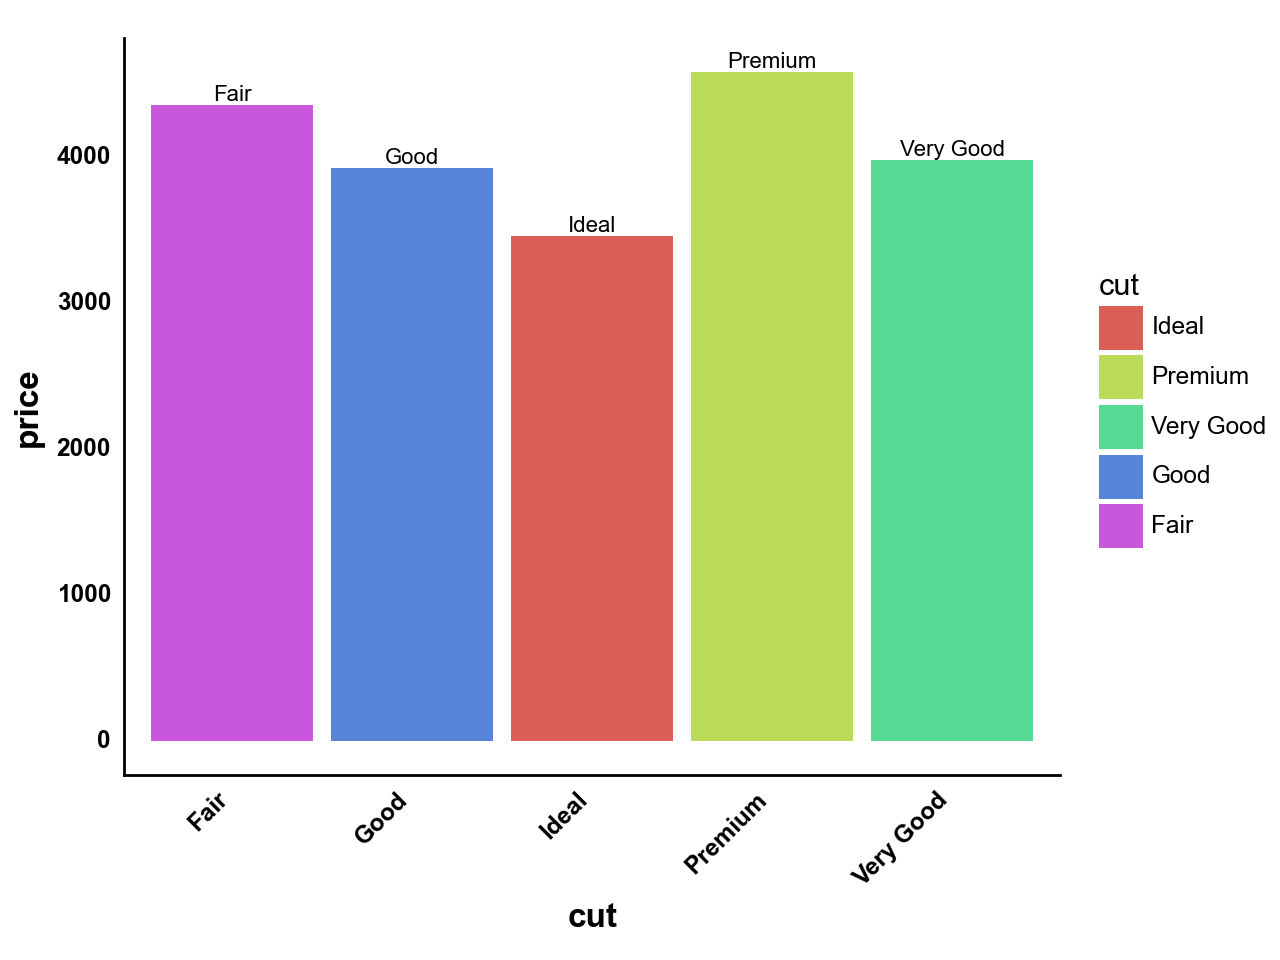

<Figure Size: (640 x 480)>

In [51]:
diamonds_sorted = diamonds.groupby('cut', observed=True)['price'].mean().reset_index()
(diamonds_sorted.tidyplot(x='cut', y='price', fill='cut')
 .add_bar(stat='identity')
 .sort_x_axis_labels('ascending')
 .add_data_labels_repel()
 .adjust_axis_text_angle(45)
 .show())

# Test label renaming

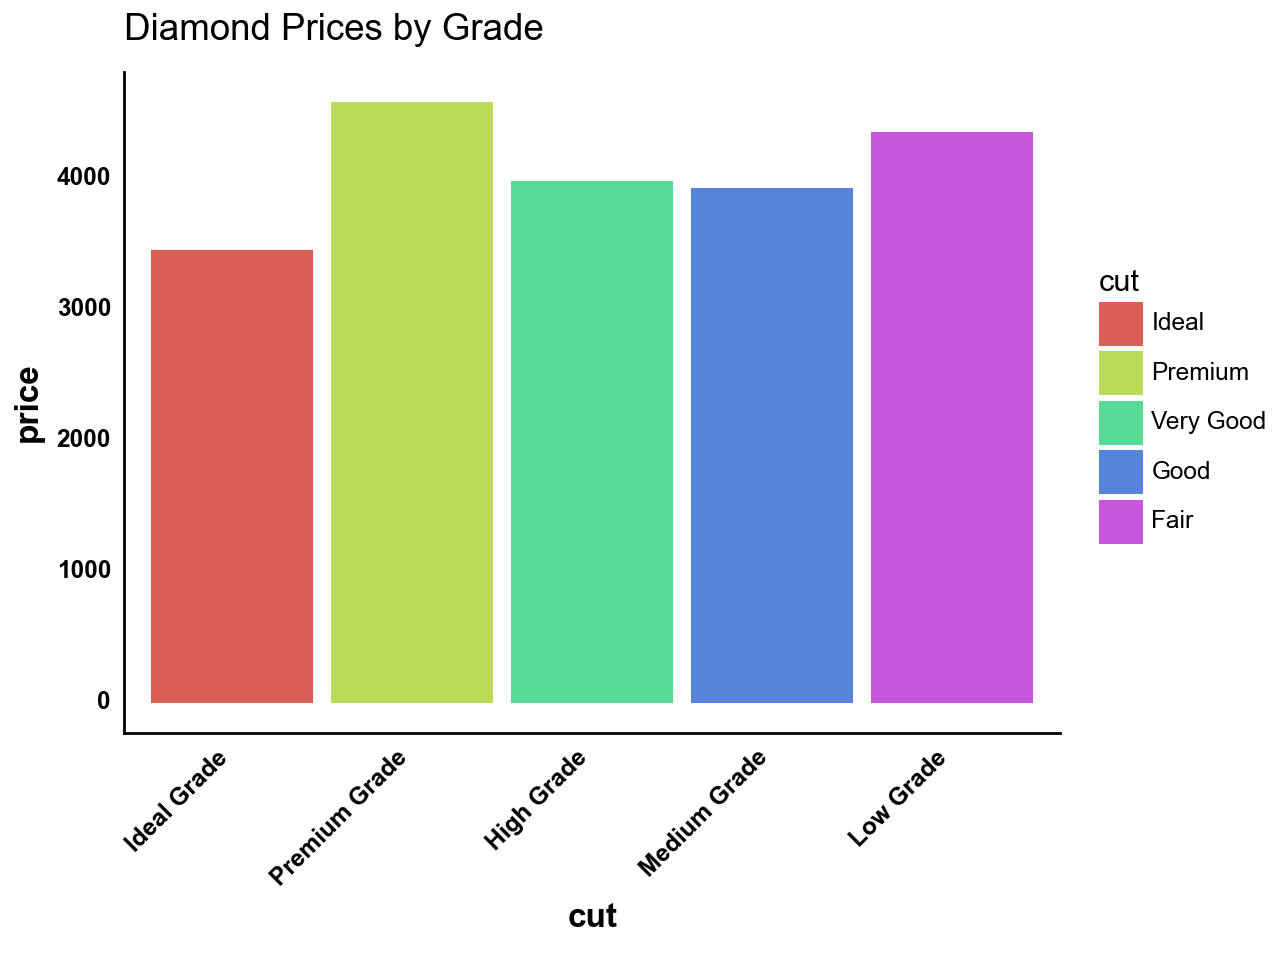

<Figure Size: (640 x 480)>

In [52]:
cut_rename = {'Fair': 'Low Grade', 'Good': 'Medium Grade', 
              'Very Good': 'High Grade', 'Premium': 'Premium Grade', 
              'Ideal': 'Ideal Grade'}
(diamonds_sorted.tidyplot(x='cut', y='price', fill='cut')
 .add_bar(stat='identity')
 .rename_x_axis_labels(cut_rename)
 .adjust_labels(title='Diamond Prices by Grade')
 .adjust_axis_text_angle(45)
 .show())

In [53]:
print("\nAll examples have been generated in the 'figures' directory.")


All examples have been generated in the 'figures' directory.
